Import Dataset

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#ast is used for safely evaluating string representations of dictionaries
import ast

In [3]:
# Specify the path to your dataset

bangalore = pd.read_excel(r'd:\0.Car Dekho Project 3\car dekho dataset\bangalore_cars.xlsx')
bangalore['location']='banglore'

chennai=pd.read_excel(r'd:\0.Car Dekho Project 3\car dekho dataset\chennai_cars.xlsx')
chennai['location']='chennai'

delhi=pd.read_excel(r'd:\0.Car Dekho Project 3\car dekho dataset\delhi_cars.xlsx')
delhi['location']='delhi'

hyderabad=pd.read_excel(r'd:\0.Car Dekho Project 3\car dekho dataset\hyderabad_cars.xlsx')
hyderabad['location']='hyderabad'

jaipur=pd.read_excel(r'd:\0.Car Dekho Project 3\car dekho dataset\jaipur_cars.xlsx')
jaipur['location']='jaipur'

kolkata=pd.read_excel(r'd:\0.Car Dekho Project 3\car dekho dataset\kolkata_cars.xlsx')
kolkata['location']='kolkata'


#Concatenant all dataset and save it
all_dataset=pd.concat([bangalore,chennai,delhi,hyderabad,jaipur,kolkata])
all_dataset.to_excel(r'd:\0.Car Dekho Project 3\car dekho dataset - extracted\extracted_dataset.xlsx', index=False)

print("The file has been saved")



The file has been saved


Extracted the data from nested dict formatt

In [8]:
# Load Dataset
all_dataset=pd.read_excel(r'd:\0.Car Dekho Project 3\car dekho dataset - extracted\extracted_dataset.xlsx')

#print the one value from eah column
print(all_dataset.shape)

# Display the random few rows of the DataFrame
all_dataset.sample(5)


(8369, 6)


,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,location
5063,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,hyderabad
5631,"{'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,hyderabad
7765,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,kolkata
2884,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,chennai
7937,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,kolkata


In [9]:
#convert the string representations of dictionaries to actual Python dictionaries:
all_dataset['new_car_detail'] = all_dataset['new_car_detail'].apply(ast.literal_eval)
all_dataset['new_car_overview'] = all_dataset['new_car_overview'].apply(ast.literal_eval)
all_dataset['new_car_feature'] = all_dataset['new_car_feature'].apply(ast.literal_eval)
all_dataset['new_car_specs'] = all_dataset['new_car_specs'].apply(ast.literal_eval)

In [10]:
#dataset Information
all_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   new_car_detail    8369 non-null   object
 1   new_car_overview  8369 non-null   object
 2   new_car_feature   8369 non-null   object
 3   new_car_specs     8369 non-null   object
 4   car_links         8369 non-null   object
 5   location          8369 non-null   object
dtypes: object(6)
memory usage: 392.4+ KB


In [11]:
#Columns Name
all_dataset.columns

Index(['new_car_detail', 'new_car_overview', 'new_car_feature',
       'new_car_specs', 'car_links', 'location'],
      dtype='object')

Pandas documentation on json_normalize for handling nested data

In [12]:
#new car detail column 1
new_car_detail=pd.json_normalize(all_dataset['new_car_detail'])
new_car_detail.head(1)

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,trendingText.imgUrl,trendingText.heading,trendingText.desc
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,3979,VXI,₹ 4 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days


In [13]:
#new_car_overview  column 2

def process_row(row):
    # Extracts the 'key' and 'value' from each dictionary in the 'top' list
    ext = {i['key']: i['value'] for i in row.get('top', [])}
    return ext

new_car_overview= pd.DataFrame(all_dataset['new_car_overview'].apply(process_row).to_list())
new_car_overview.head(1)

,Registration Year,Insurance Validity,Fuel Type,Seats,Kms Driven,RTO,Ownership,Engine Displacement,Transmission,Year of Manufacture
0,2015,Third Party insurance,Petrol,5 Seats,"1,20,000 Kms",KA51,Third Owner,998 cc,Manual,2015.0


In [14]:
#new_car_feature  column 3
def flatten_feature(row):

    flattened = {}


    # Extract 'top' list
    for item in row.get('top', []):
        flattened[item['value']] = True

    # Extract 'data' list
    for section in row.get('data', []):
        for item in section.get('list', []):
            flattened[item['value']]=True

    return flattened

# Assuming flatten_specs is defined and works correctly
new_car_feature = all_dataset['new_car_feature'].apply(flatten_feature)
print(new_car_feature)

# Convert the Series of dictionaries to a DataFrame
new_car_feature = pd.DataFrame(new_car_feature.tolist())

# Set display options (this line should be separate)
pd.set_option('display.max_columns', None)

#fill 'false' if the column has nan values
#new_car_feature=new_car_feature.fillna(False)

# Display the first row of the DataFrame
new_car_feature.head(1)


0       {'Power Steering': True, 'Power Windows Front'...
1       {'Power Steering': True, 'Power Windows Front'...
2       {'Power Steering': True, 'Power Windows Front'...
3       {'Power Steering': True, 'Power Windows Front'...
4       {'Power Steering': True, 'Power Windows Front'...
                              ...                        
8364    {'Power Steering': True, 'Power Windows Front'...
8365    {'Power Steering': True, 'Power Windows Front'...
8366    {'Power Steering': True, 'Power Windows Front'...
8367    {'Power Steering': True, 'Power Windows Front'...
8368    {'Power Steering': True, 'Power Windows Front'...
Name: new_car_feature, Length: 8369, dtype: object


,Power Steering,Power Windows Front,Air Conditioner,Heater,Adjustable Head Lights,Manually Adjustable Exterior Rear View Mirror,Centeral Locking,Child Safety Locks,Power Windows Rear,Remote Trunk Opener,Remote Fuel Lid Opener,Low Fuel Warning Light,Accessory Power Outlet,Vanity Mirror,Rear Seat Headrest,Cup Holders Front,Digital Odometer,Electronic Multi Tripmeter,Fabric Upholstery,Glove Compartment,Digital Clock,Wheel Covers,Power Antenna,Chrome Grille,Day Night Rear View Mirror,Passenger Side Rear View Mirror,Halogen Headlamps,Rear Seat Belts,Door Ajar Warning,Side Impact Beams,Front Impact Beams,Adjustable Seats,Centrally Mounted Fuel Tank,Engine Immobilizer,Anti Theft Device,Fog Lights Front,Anti Lock Braking System,Cd Player,Trunk Light,Multifunction Steering Wheel,Navigation System,Smart Access Card Entry,Engine Start Stop Button,Gear Shift Indicator,Luggage Hook And Net,Adjustable Steering,Tachometer,Leather Steering Wheel,Outside Temperature Display,Height Adjustable Driver Seat,Power Adjustable Exterior Rear View Mirror,Electric Folding Rear View Mirror,Rear Window Wiper,Rear Window Washer,Rear Window Defogger,Alloy Wheels,Integrated Antenna,Outside Rear View Mirror Turn Indicators,Roof Rail,Power Door Locks,Driver Air Bag,Passenger Air Bag,Seat Belt Warning,Keyless Entry,Engine Check Warning,Crash Sensor,Ebd,Follow Me Home Headlamps,Rear Camera,Speed Sensing Auto Door Lock,Pretensioners And Force Limiter Seatbelts,Impact Sensing Auto Door Lock,No Of Airbags,Radio,Speakers Front,Speakers Rear,Integrated2Din Audio,Usb Auxiliary Input,Bluetooth,Touch Screen,Number Of Speaker,Glove Box Cooling,Driving Experience Control Eco,Tinted Glass,Rear Spoiler,Chrome Garnish,Vehicle Stability Control System,Rear Reading Lamp,Rear Seat Centre Arm Rest,Cup Holders Rear,Rear ACVents,Air Quality Control,Height Adjustable Front Seat Belts,Cruise Control,Voice Control,Audio System Remote Control,Leather Seats,Fog Lights Rear,Traction Control,Seat Lumbar Support,Battery Saver,Lane Change Indicator,Sun Roof,Automatic Driving Lights,Anti Theft Alarm,Automatic Head Lamps,Isofix Child Seat Mounts,Hill Assist,Tailgate Ajar,Brake Assist,Steering Wheel Gearshift Paddles,LEDTaillights,Cigarette Lighter,Rain Sensing Wiper,Drive Modes,Active Noise Cancellation,Adjustable Headrest,Hands Free Tailgate,Dual Tone Dashboard,Leather Wrap Gear Shift Selector,Dual Tone Body Colour,LEDDRLs,LEDHeadlights,Cornering Headlamps,Cornering Foglamps,Side Air Bag Front,Side Air Bag Rear,Tyre Pressure Monitor,Clutch Lock,Anti Pinch Power Windows,Knee Airbags,Apple Car Play,Android Auto,Mirror Link,Wireless Phone Charging,Compass,Moon Roof,Projector Headlamps,Speed Alert,Eletronic Stability Control,Touch Screen Size,Xenon Headlamps,Cd Changer,Power Boot,Rear Folding Table,Smoke Headlamps,Dvd Player,Internal Storage,Rear Entertainment System,Remote Engine Start Stop,Ventilated Seats,LEDFog Lamps,View360Camera,Geo Fence Alert,Steering Mounted Tripmeter,Remote Climate Control,Remote Horn Light Control,Heated Wing Mirror,Side Stepper,Blind Spot Monitor,Hill Descent Control,Heads Up Display,Sos Emergency Assistance,Cassette Player,Find My Car Location,Wifi Connectivity,Headlamp Washers,Real Time Vehicle Tracking,Roof Carrier,Smart Key Band,Lane Watch Camera,Removable Convertible Top,Power Folding3rd Row Seat
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [15]:
#new_car_specs  column 4

def flatten_specs(row):
    flattened = {}

    # Extract 'top' list
    for item in row.get('top', []):
        flattened[item['key']] = item['value']

    # Extract 'data' list
    for section in row.get('data', []):
        for item in section.get('list', []):
            flattened[item['key']]= item['value']

    return flattened

# Assuming flatten_specs is defined and works correctly
new_car_specs = all_dataset['new_car_specs'].apply(flatten_specs)
print(new_car_specs)

# Convert the Series of dictionaries to a DataFrame
new_car_specs = pd.DataFrame(new_car_specs.tolist())

# Set display options (this line should be separate)
pd.set_option('display.max_columns', None)


# Display the first row of the DataFrame
new_car_specs.head(1)

0       {'Mileage': '23.1 kmpl', 'Engine': '998 CC', '...
1       {'Mileage': '17 kmpl', 'Engine': '1497 CC', 'M...
2       {'Mileage': '23.84 kmpl', 'Engine': '1199 CC',...
3       {'Mileage': '19.1 kmpl', 'Engine': '1197 CC', ...
4       {'Mileage': '23.65 kmpl', 'Engine': '1248 CC',...
                              ...                        
8364    {'Mileage': '25.24 kmpl', 'Engine': '998 CC', ...
8365    {'Mileage': '22.74 kmpl', 'Engine': '796 CC', ...
8366    {'Mileage': '11.74 kmpl', 'Engine': '1796 CC',...
8367    {'Mileage': '18.5 kmpl', 'Engine': '1197 CC', ...
8368    {'Mileage': '19.72 kmpl', 'Engine': '1461 CC',...
Name: new_car_specs, Length: 8369, dtype: object


,Mileage,Engine,Max Power,Torque,Seats,Color,Engine Type,Displacement,Max Torque,No of Cylinder,Values per Cylinder,Value Configuration,Fuel Suppy System,BoreX Stroke,Compression Ratio,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seating Capacity,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,Alloy Wheel Size,Ground Clearance Unladen
0,23.1 kmpl,998 CC,67.04bhp@6000rpm,90Nm,5,White,K10B Engine,998,90Nm@3500rpm,3.0,4.0,DOHC,MPFi,73 X 82 mm,11.0:1,No,No,3715mm,1635mm,1565mm,2425mm,1420mm,1410mm,835kg,1250kg,5 Speed,FWD,5,Power,4.7 metres,Ventilated Disc,Drum,150 Kmph,15.05 Seconds,"Tubeless, Radial",5,235-litres,NaN,NaN,NaN


In [16]:
#location column 5

location=all_dataset['location']
location.head(1)

0    banglore
Name: location, dtype: object

In [18]:
#Concat and save the extracted dataset
extracted_dataset=pd.concat([new_car_detail.reset_index(drop=True),new_car_overview.reset_index(drop=True),new_car_feature.reset_index(drop=True),new_car_specs.reset_index(drop=True),location.reset_index(drop=True)],axis=1)
extracted_dataset.to_excel(r'd:\0.Car Dekho Project 3\car dekho dataset - extracted\extracted_dataset.xlsx',index=False)
print('the extracted Dataset has beed savd')

the extracted Dataset has beed savd


Data Preprocessing

In [19]:
#load dataset
car_dekho=pd.read_excel(r'd:\0.Car Dekho Project 3\car dekho dataset - extracted\extracted_dataset.xlsx')
print(car_dekho.shape)
car_dekho.head(3)


(8369, 243)


,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,trendingText.imgUrl,trendingText.heading,trendingText.desc,Registration Year,Insurance Validity,Fuel Type,Seats,Kms Driven,RTO,Ownership,Engine Displacement,Transmission,Year of Manufacture,Power Steering,Power Windows Front,Air Conditioner,Heater,Adjustable Head Lights,Manually Adjustable Exterior Rear View Mirror,Centeral Locking,Child Safety Locks,Power Windows Rear,Remote Trunk Opener,Remote Fuel Lid Opener,Low Fuel Warning Light,Accessory Power Outlet,Vanity Mirror,Rear Seat Headrest,Cup Holders Front,Digital Odometer,Electronic Multi Tripmeter,Fabric Upholstery,Glove Compartment,Digital Clock,Wheel Covers,Power Antenna,Chrome Grille,Day Night Rear View Mirror,Passenger Side Rear View Mirror,Halogen Headlamps,Rear Seat Belts,Door Ajar Warning,Side Impact Beams,Front Impact Beams,Adjustable Seats,Centrally Mounted Fuel Tank,Engine Immobilizer,Anti Theft Device,Fog Lights Front,Anti Lock Braking System,Cd Player,Trunk Light,Multifunction Steering Wheel,Navigation System,Smart Access Card Entry,Engine Start Stop Button,Gear Shift Indicator,Luggage Hook And Net,Adjustable Steering,Tachometer,Leather Steering Wheel,Outside Temperature Display,Height Adjustable Driver Seat,Power Adjustable Exterior Rear View Mirror,Electric Folding Rear View Mirror,Rear Window Wiper,Rear Window Washer,Rear Window Defogger,Alloy Wheels,Integrated Antenna,Outside Rear View Mirror Turn Indicators,Roof Rail,Power Door Locks,Driver Air Bag,Passenger Air Bag,Seat Belt Warning,Keyless Entry,Engine Check Warning,Crash Sensor,Ebd,Follow Me Home Headlamps,Rear Camera,Speed Sensing Auto Door Lock,Pretensioners And Force Limiter Seatbelts,Impact Sensing Auto Door Lock,No Of Airbags,Radio,Speakers Front,Speakers Rear,Integrated2Din Audio,Usb Auxiliary Input,Bluetooth,Touch Screen,Number Of Speaker,Glove Box Cooling,Driving Experience Control Eco,Tinted Glass,Rear Spoiler,Chrome Garnish,Vehicle Stability Control System,Rear Reading Lamp,Rear Seat Centre Arm Rest,Cup Holders Rear,Rear ACVents,Air Quality Control,Height Adjustable Front Seat Belts,Cruise Control,Voice Control,Audio System Remote Control,Leather Seats,Fog Lights Rear,Traction Control,Seat Lumbar Support,Battery Saver,Lane Change Indicator,Sun Roof,Automatic Driving Lights,Anti Theft Alarm,Automatic Head Lamps,Isofix Child Seat Mounts,Hill Assist,Tailgate Ajar,Brake Assist,Steering Wheel Gearshift Paddles,LEDTaillights,Cigarette Lighter,Rain Sensing Wiper,Drive Modes,Active Noise Cancellation,Adjustable Headrest,Hands Free Tailgate,Dual Tone Dashboard,Leather Wrap Gear Shift Selector,Dual Tone Body Colour,LEDDRLs,LEDHeadlights,Cornering Headlamps,Cornering Foglamps,Side Air Bag Front,Side Air Bag Rear,Tyre Pressure Monitor,Clutch Lock,Anti Pinch Power Windows,Knee Airbags,Apple Car Play,Android Auto,Mirror Link,Wireless Phone Charging,Compass,Moon Roof,Projector Headlamps,Speed Alert,Eletronic Stability Control,Touch Screen Size,Xenon Headlamps,Cd Changer,Power Boot,Rear Folding Table,Smoke Headlamps,Dvd Player,Internal Storage,Rear Entertainment System,Remote Engine Start Stop,Ventilated Seats,LEDFog Lamps,View360Camera,Geo Fence Alert,Steering Mounted Tripmeter,Remote Climate Control,Remote Horn Light Control,Heated Wing Mirror,Side Stepper,Blind Spot Monitor,Hill Descent Control,Heads Up Display,Sos Emergency Assistance,Cassette Player,Find My Car Location,Wifi Connectivity,Headlamp Washers,Real Time Vehicle Tracking,Roof Carrier,Smart Key Band,Lane Watch Camera,Removable Convertible Top,Power Folding3rd Row Seat,Mileage,Engine,Max Power,Torque,Seats.1,Color,Engine Type,Displacement,Max Torque,No of Cylinder,Values per Cylinder,Value Configuration,Fuel Suppy System,BoreX Stroke,Compression Ratio,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seating Capacity,Steering Type,Turning Ra

In [21]:
car_dekho.isnull().sum()

it                             0
ft                             0
bt                             4
km                             0
transmission                   0
                            ... 
Cargo Volumn                1593
Wheel Size                  2983
Alloy Wheel Size            2983
Ground Clearance Unladen    7854
location                       0
Length: 243, dtype: int64

If a column has more than 50% null values, it might be reasonable to drop it, as it may not provide enough information for the model.
#Determine the threshold for null values based on the total number of rows in your dataset.

In [22]:
threshold=int(len(car_dekho)*0.5)
car_dekho.dropna(thresh=threshold,axis=1,inplace=True)
car_dekho.shape

(8369, 122)

#If a column has only one unique value, it may not provide useful information for your analysis or modeling,Drop the column has 1 unique value

In [23]:
one_unique_columns=car_dekho.nunique()==1
car_dekho=car_dekho.drop(columns=car_dekho.columns[one_unique_columns])
car_dekho.shape

(8369, 59)

Drop unwanted columns 

In [24]:
car_dekho.drop(columns=['Fuel Type','Kms Driven','Transmission','owner','Ownership'],axis=1,inplace=True)
car_dekho.drop(columns=['centralVariantId','Registration Year','Year of Manufacture'],axis=1,inplace=True)
car_dekho.drop(columns=['Seats.1','Seating Capacity','Engine Displacement','Engine'],axis=1,inplace=True)
car_dekho.drop(columns=['Max Power','Max Torque','Length','Width','Height','Value Configuration','Wheel Base','Front Tread','Rear Tread','Kerb Weight','Values per Cylinder','Turning Radius','Top Speed','Acceleration','Cargo Volumn','Wheel Size','Alloy Wheel Size'],axis=1,inplace=True)
car_dekho.head(3)

,ft,bt,km,transmission,ownerNo,oem,model,modelYear,variantName,price,Insurance Validity,Seats,RTO,Mileage,Torque,Color,Engine Type,Displacement,No of Cylinder,Fuel Suppy System,Turbo Charger,Super Charger,Gear Box,Drive Type,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,No Door Numbers,location
0,Petrol,Hatchback,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,VXI,₹ 4 Lakh,Third Party insurance,5 Seats,KA51,23.1 kmpl,90Nm,White,K10B Engine,998.0,3.0,MPFi,No,No,5 Speed,FWD,Power,Ventilated Disc,Drum,"Tubeless, Radial",5.0,banglore
1,Petrol,SUV,"32,706",Manual,2,Ford,Ford Ecosport,2018,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh,Comprehensive,5 Seats,KA05,17 kmpl,150Nm,White,Ti-VCT Petrol Engine,1497.0,3.0,Direct Injection,No,No,5 Speed,FWD,Power,Ventilated Disc,Drum,"Tubeless,Radial",4.0,banglore
2,Petrol,Hatchback,"11,949",Manual,1,Tata,Tata Tiago,2018,1.2 Revotron XZ,₹ 5.85 Lakh,Comprehensive,5 Seats,KA03,23.84 kmpl,114Nm,Red,Revotron Engine,1199.0,3.0,MPFi,No,No,5 Speed,FWD,Power,Disc,Drum,Tubeless,5.0,banglore


drop duplicates

In [25]:
#check the duplicate rows 
car_dekho.duplicated().sum()

#drop duplicates
car_dekho.drop_duplicates(keep='first',inplace=True)
car_dekho.duplicated().sum()

np.int64(0)

In [26]:
#dataset information
car_dekho.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8281 entries, 0 to 8368
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ft                  8281 non-null   object 
 1   bt                  8277 non-null   object 
 2   km                  8281 non-null   object 
 3   transmission        8281 non-null   object 
 4   ownerNo             8281 non-null   int64  
 5   oem                 8281 non-null   object 
 6   model               8281 non-null   object 
 7   modelYear           8281 non-null   int64  
 8   variantName         8281 non-null   object 
 9   price               8281 non-null   object 
 10  Insurance Validity  8277 non-null   object 
 11  Seats               8275 non-null   object 
 12  RTO                 7407 non-null   object 
 13  Mileage             7996 non-null   object 
 14  Torque              8221 non-null   object 
 15  Color               8278 non-null   object 
 16  Engine Type

In [27]:
# Gear Box
def clean_numeric(value):
    if pd.isna(value):  # Check if the value is NaN
        return pd.NA  # Return NaN if value is NaN
    else:
        digit=''.join(filter(str.isdigit, str(value)))  # Extract digits only
        return int(digit) if digit else pd.NA
car_dekho['Gear Box']=car_dekho['Gear Box'].apply(clean_numeric)
car_dekho['Gear Box']=pd.to_numeric(car_dekho['Gear Box'],errors='coerce')
car_dekho.head(1)

,ft,bt,km,transmission,ownerNo,oem,model,modelYear,variantName,price,Insurance Validity,Seats,RTO,Mileage,Torque,Color,Engine Type,Displacement,No of Cylinder,Fuel Suppy System,Turbo Charger,Super Charger,Gear Box,Drive Type,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,No Door Numbers,location
0,Petrol,Hatchback,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,VXI,₹ 4 Lakh,Third Party insurance,5 Seats,KA51,23.1 kmpl,90Nm,White,K10B Engine,998.0,3.0,MPFi,No,No,5.0,FWD,Power,Ventilated Disc,Drum,"Tubeless, Radial",5.0,banglore


In [28]:
#Torque
def clean_floating(value):
    if pd.isna(value):
        return pd.NA
    else:
        value = ''.join(filter(lambda x: x.isdigit() or x == '.', str(value)))  # Keep digits and decimal points
        return float(value) if value else pd.NA
car_dekho['Torque']=car_dekho['Torque'].apply(clean_floating)
car_dekho['Torque']=pd.to_numeric(car_dekho['Torque'],errors='coerce')
car_dekho.head(1)

,ft,bt,km,transmission,ownerNo,oem,model,modelYear,variantName,price,Insurance Validity,Seats,RTO,Mileage,Torque,Color,Engine Type,Displacement,No of Cylinder,Fuel Suppy System,Turbo Charger,Super Charger,Gear Box,Drive Type,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,No Door Numbers,location
0,Petrol,Hatchback,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,VXI,₹ 4 Lakh,Third Party insurance,5 Seats,KA51,23.1 kmpl,90.0,White,K10B Engine,998.0,3.0,MPFi,No,No,5.0,FWD,Power,Ventilated Disc,Drum,"Tubeless, Radial",5.0,banglore


In [29]:
# Mileage
def clean_floating(value):
    if pd.isna(value):
        return pd.NA
    else:
        value = ''.join(filter(lambda x: x.isdigit() or x == '.', str(value)))  # Keep digits and decimal points
        return float(value) if value else pd.NA
    
car_dekho['Mileage']=car_dekho['Mileage'].apply(clean_floating)
car_dekho['Mileage']=pd.to_numeric(car_dekho['Mileage'],errors='coerce')
car_dekho.head(1)

,ft,bt,km,transmission,ownerNo,oem,model,modelYear,variantName,price,Insurance Validity,Seats,RTO,Mileage,Torque,Color,Engine Type,Displacement,No of Cylinder,Fuel Suppy System,Turbo Charger,Super Charger,Gear Box,Drive Type,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,No Door Numbers,location
0,Petrol,Hatchback,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,VXI,₹ 4 Lakh,Third Party insurance,5 Seats,KA51,23.1,90.0,White,K10B Engine,998.0,3.0,MPFi,No,No,5.0,FWD,Power,Ventilated Disc,Drum,"Tubeless, Radial",5.0,banglore


In [31]:
#Seats               
def clean_numeric(value):
    if pd.isna(value):  # Check if the value is NaN
        return pd.NA  # Return NaN if value is NaN
    else:
        digit=''.join(filter(str.isdigit, str(value)))  # Extract digits only
        return int(digit) if digit else pd.NA
    
car_dekho['Seats']=car_dekho['Seats'].apply(clean_numeric)
car_dekho['Seats']=pd.to_numeric(car_dekho['Seats'],errors='coerce')
car_dekho['Seats'].dtype
car_dekho.head(1)

,ft,bt,km,transmission,ownerNo,oem,model,modelYear,variantName,price,Insurance Validity,Seats,RTO,Mileage,Torque,Color,Engine Type,Displacement,No of Cylinder,Fuel Suppy System,Turbo Charger,Super Charger,Gear Box,Drive Type,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,No Door Numbers,location
0,Petrol,Hatchback,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,VXI,₹ 4 Lakh,Third Party insurance,50.0,KA51,23.1,90.0,White,K10B Engine,998.0,3.0,MPFi,No,No,5.0,FWD,Power,Ventilated Disc,Drum,"Tubeless, Radial",5.0,banglore


In [32]:
#price

# Remove '₹' symbol
car_dekho['price'] = car_dekho['price'].str.replace('₹', '').str.strip()


# Convert 'Lakh' and 'Crore' to numeric values
#This function converts the string prices to numeric values. It handles 'Lakh', 'Crore', and regular numbers, converting them to the appropriate numeric format.

def convert_price(price):
    if 'Lakh' in price:
        return float(price.replace('Lakh', '').replace(',', '').strip()) * 100000
    elif 'Crore' in price:
        return float(price.replace('Crore', '').replace(',', '').strip()) * 10000000
    else:
        return float(price.replace(',', '').strip())

# Apply the conversion function
car_dekho['price'] = car_dekho['price'].apply(convert_price)
car_dekho.head(1)

,ft,bt,km,transmission,ownerNo,oem,model,modelYear,variantName,price,Insurance Validity,Seats,RTO,Mileage,Torque,Color,Engine Type,Displacement,No of Cylinder,Fuel Suppy System,Turbo Charger,Super Charger,Gear Box,Drive Type,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,No Door Numbers,location
0,Petrol,Hatchback,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,VXI,400000.0,Third Party insurance,50.0,KA51,23.1,90.0,White,K10B Engine,998.0,3.0,MPFi,No,No,5.0,FWD,Power,Ventilated Disc,Drum,"Tubeless, Radial",5.0,banglore


In [33]:
#km
def clean_floating(value):
    if pd.isna(value):
        return pd.NA
    else:
        value = ''.join(filter(lambda x: x.isdigit() or x == '.', str(value)))  # Keep digits and decimal points
        return float(value) if value else pd.NA
car_dekho['km']=car_dekho['km'].apply(clean_floating)
car_dekho.head(1)


,ft,bt,km,transmission,ownerNo,oem,model,modelYear,variantName,price,Insurance Validity,Seats,RTO,Mileage,Torque,Color,Engine Type,Displacement,No of Cylinder,Fuel Suppy System,Turbo Charger,Super Charger,Gear Box,Drive Type,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,No Door Numbers,location
0,Petrol,Hatchback,120000.0,Manual,3,Maruti,Maruti Celerio,2015,VXI,400000.0,Third Party insurance,50.0,KA51,23.1,90.0,White,K10B Engine,998.0,3.0,MPFi,No,No,5.0,FWD,Power,Ventilated Disc,Drum,"Tubeless, Radial",5.0,banglore


In [34]:
car_dekho.isna().sum()

ft                       0
bt                       4
km                       0
transmission             0
ownerNo                  0
oem                      0
model                    0
modelYear                0
variantName              0
price                    0
Insurance Validity       4
Seats                    6
RTO                    874
Mileage                285
Torque                  60
Color                    3
Engine Type            290
Displacement             4
No of Cylinder          31
Fuel Suppy System     1708
Turbo Charger         1029
Super Charger         1938
Gear Box               324
Drive Type            1540
Steering Type          254
Front Brake Type        96
Rear Brake Type         96
Tyre Type               77
No Door Numbers         11
location                 0
dtype: int64

In [58]:
# Take a copy the dataset for prevent from further analysis
copy_cardekho=car_dekho.copy()

In [71]:
#Identify Numeric columns to Handle missing values and Handle Outliers
numeric_columns=copy_cardekho.select_dtypes(include=['number'])
print(numeric_columns.columns)
numeric_columns.isna().sum()


Index(['km', 'ownerNo', 'modelYear', 'price', 'Seats', 'Mileage', 'Torque',
       'Displacement', 'No of Cylinder', 'Gear Box', 'No Door Numbers'],
      dtype='object')


km                   0
ownerNo              0
modelYear            0
price                0
Seats                0
Mileage              0
Torque               0
Displacement         4
No of Cylinder      31
Gear Box           324
No Door Numbers     11
dtype: int64

In [79]:
#Import  'HistGradientBoostingRegressor' to Handle Missing Values
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingClassifier


In [61]:
#Mileage

# Ensure you are working only with numerical columns
numeric_columns = copy_cardekho.select_dtypes(include=['number'])


# Preparing Data
X_train = numeric_columns[numeric_columns['Mileage'].notna()].drop(['Mileage'], axis=1)
y_train = numeric_columns[numeric_columns['Mileage'].notna()]['Mileage']
X_test = numeric_columns[numeric_columns['Mileage'].isna()].drop(['Mileage'], axis=1)

# Train HistGradientBoostingRegressor model (no need to impute missing values)
hist_gb = HistGradientBoostingRegressor()
hist_gb.fit(X_train, y_train)

# Predict missing Mileage values
y_pred = hist_gb.predict(X_test)

# Fill missing values with predictions
copy_cardekho.loc[copy_cardekho['Mileage'].isnull(), 'Mileage'] = y_pred

<Axes: ylabel='Mileage'>

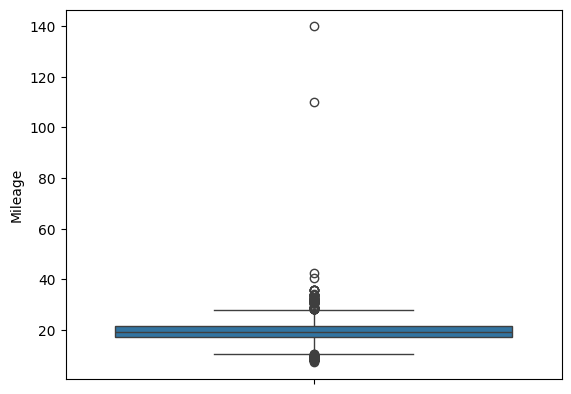

In [62]:
# Mileage
sns.boxplot(copy_cardekho['Mileage'])

Capping the outlier for Prevent from the Data Loss

31.37496285297264
6.99878943783899


<Axes: ylabel='Mileage'>

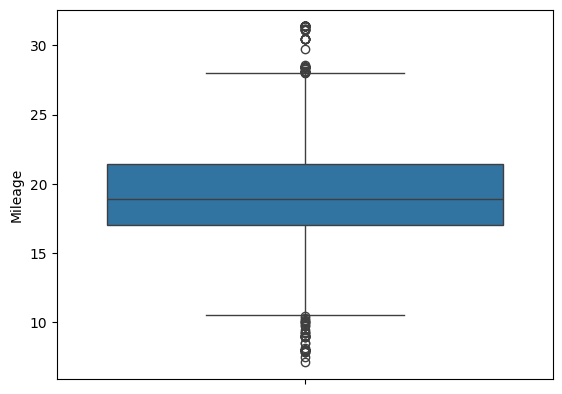

In [63]:
upper_limit=copy_cardekho['Mileage'].mean()+3*copy_cardekho['Mileage'].std()
lower_limit=copy_cardekho['Mileage'].mean()-3*copy_cardekho['Mileage'].std()
print(upper_limit)
print(lower_limit)
copy_cardekho['Mileage']=np.where(copy_cardekho['Mileage']>upper_limit,upper_limit,copy_cardekho['Mileage'])
copy_cardekho['Mileage']=np.where(copy_cardekho['Mileage']<lower_limit,lower_limit,copy_cardekho['Mileage'])

#Check the Outlier was Handled 
sns.boxplot(copy_cardekho['Mileage'])

In [64]:
print(copy_cardekho['Mileage'].describe())
copy_cardekho['Mileage'].isna().sum()

count    8281.000000
mean       19.154668
std         3.674679
min         7.080000
25%        17.000000
50%        18.900000
75%        21.400000
max        31.374963
Name: Mileage, dtype: float64


np.int64(0)

In [65]:
#Seats

# Select rows where 'Seats' is NaN and retrieve 'oem' and 'model' columns
nan_seats_info = copy_cardekho[copy_cardekho['Seats'].isna()][['oem', 'model']]
nan_seats_info

,oem,model
1175,Maruti,Maruti Estilo
3528,Nissan,Nissan Kicks
6211,Ford,Ford Endeavour
7608,Maruti,Maruti Estilo
7669,Maruti,Maruti Estilo
7745,Hindustan Motors,Ambassador


In [67]:
#Fill NAN seats by Car Model
seats={'Maruti Estilo':5,'Nissan Kicks':5,'Ford Endeavour':7,'Ambassador':5}
copy_cardekho['Seats']=copy_cardekho['Seats'].fillna(copy_cardekho['model'].map(seats))
copy_cardekho['Seats'].isnull().sum()

np.int64(0)

In [68]:
#Torque

# Ensure you are working only with numerical columns
numeric_columns = copy_cardekho.select_dtypes(include=['number'])

# Preparing Data
X_train = numeric_columns[numeric_columns['Torque'].notna()].drop(['Torque'], axis=1)
y_train = numeric_columns[numeric_columns['Torque'].notna()]['Torque']
X_test = numeric_columns[numeric_columns['Torque'].isna()].drop(['Torque'], axis=1)

# Train HistGradientBoostingRegressor model
hist_gb = HistGradientBoostingRegressor()
hist_gb.fit(X_train, y_train)

# Predict missing Torque values
y_pred = hist_gb.predict(X_test)

# Fill missing values with predictions
copy_cardekho.loc[copy_cardekho['Torque'].isnull(), 'Torque'] = y_pred

#check Nan Values filled
copy_cardekho['Torque'].isna().sum()

np.int64(0)

<Axes: ylabel='Torque'>

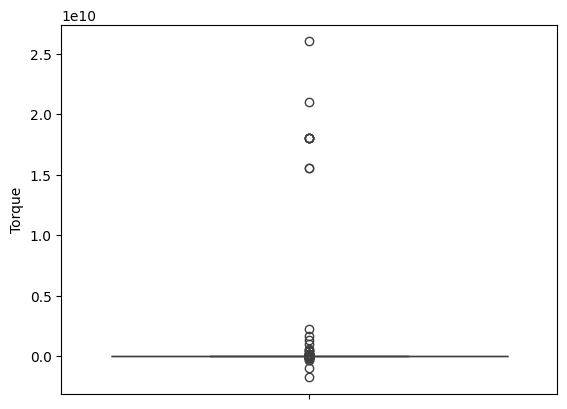

In [69]:

sns.boxplot(copy_cardekho['Torque'])

In [53]:
copy_cardekho['Torque'].sort_values(ascending=True).to_list()


[4.8,
 4.8,
 4.8,
 4.8,
 4.8,
 6.1,
 6.1,
 7.8,
 7.8,
 7.8,
 7.8,
 8.5,
 8.5,
 8.6,
 8.6,
 9.4,
 9.8,
 9.8,
 10.4,
 10.4,
 10.7,
 11.0,
 11.3,
 11.4,
 11.4,
 11.4,
 11.44,
 11.44,
 11.44,
 11.44,
 11.44,
 11.44,
 11.44,
 11.44,
 11.44,
 11.44,
 11.44,
 11.44,
 11.44,
 11.44,
 11.44,
 11.44,
 11.44,
 11.44,
 11.44,
 11.44,
 11.44,
 11.44,
 11.44,
 11.44,
 11.44,
 11.44,
 11.44,
 11.44,
 11.44,
 11.44,
 11.44,
 11.44,
 11.44,
 11.44,
 11.44,
 11.44,
 11.44,
 11.44,
 11.44,
 11.44,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.5,
 11.8,
 12.0,
 12.5,
 12.5,
 12.5,
 12.5,
 12.5,
 12.5,
 12.5,
 12.7,
 12.7,
 12.7,
 12.7,
 12.7,
 12.7,
 12.7,
 12.7,
 12.9,
 13.0,
 13.1,
 13.1,
 13.5,
 13.5,
 13.5,
 13.5,
 13.5,
 13.5,
 14.9,
 14.9,
 14.9,
 14.9,
 14.93,
 14.93,
 16.0,
 16.0,
 16.0,
 16.1,
 16.3,
 16.3,
 17.5,
 17.8,
 19.0,
 19.0,
 19.0,
 20.0,
 20.0,
 20.0,
 20.4,
 20.4,
 20.4,
 20.4,
 20.4,
 20.4,
 20.4,
 20.4,
 20.4,
 20.4,
 20.4,
 20.4,
 20.4,
 20.4,
 20.4,
 20.4,
 20.4,
 20

1000
110


count    8281.000000
mean      192.060455
std       130.791441
min       110.000000
25%       110.000000
50%       140.000000
75%       219.700000
max      1000.000000
Name: Torque, dtype: float64

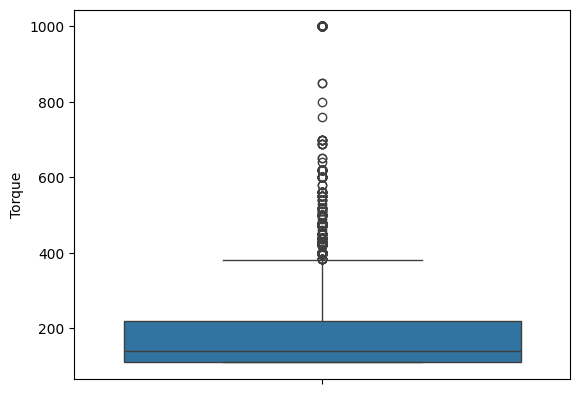

In [70]:
#Torque
# Define a realistic upper limit for torque based on known data
upper_limit = 1000
lower_limit=110
print(upper_limit)
print(lower_limit)
copy_cardekho['Torque']=np.where(copy_cardekho['Torque']<lower_limit,lower_limit,copy_cardekho['Torque'])
copy_cardekho['Torque']=np.where(copy_cardekho['Torque']>upper_limit,upper_limit,copy_cardekho['Torque'])


sns.boxplot(copy_cardekho['Torque'])
copy_cardekho['Torque'].describe()

In [72]:
#Displacement
Displacement=copy_cardekho.loc[copy_cardekho['Displacement'].isna()]
Displacement

,ft,bt,km,transmission,ownerNo,oem,model,modelYear,variantName,price,Insurance Validity,Seats,RTO,Mileage,Torque,Color,Engine Type,Displacement,No of Cylinder,Fuel Suppy System,Turbo Charger,Super Charger,Gear Box,Drive Type,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,No Door Numbers,location
487,Petrol,SUV,10000.0,Manual,3,Maruti,Maruti Gypsy,1995,MG410W ST,400000.0,Third Party insurance,60.0,NaN,28.417803,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Power,NaN,NaN,"Tubeless,Radial",3.0,banglore
490,Petrol,SUV,10000.0,Manual,3,Maruti,Maruti Gypsy,1995,MG410W HT,400000.0,Third Party insurance,80.0,KA18,28.180711,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Power,NaN,NaN,"Tubeless,Radial",3.0,banglore
574,Electric,Hatchback,20000.0,Automatic,1,Mahindra,Mahindra e2o Plus,2017,P6,550000.0,Third Party insurance,40.0,KA03,31.374963,110.0,Red,210AH Lithium Ion,NaN,4.0,3 Phase AC Induction Motors,No,No,NaN,FWD,Electric,Disc,Drum,"Tubeless, Radial",5.0,banglore
5510,Petrol,Sedan,135000.0,Manual,1,Mercedes-Benz,Mercedes-Benz C-Class,2002,180 elegance,225000.0,Third Party insurance,50.0,AP28,27.004637,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Power,NaN,NaN,"Tubeless,Radial",4.0,hyderabad


In [ ]:
# Fill the Nan Displacement by it actual Displacement
displacement={'Maruti Gypsy':998,'Mahindra e2o Plus':0,'Mercedes-Benz C-Class':1950}
copy_cardekho['Displacement']=copy_cardekho['Displacement'].fillna(copy_cardekho['model'].map(displacement))

copy_cardekho['Displacement'].isna().sum()

In [ ]:
dis_u=copy_cardekho['Displacement'].unique().tolist()
dis_u.min

<Axes: ylabel='Displacement'>

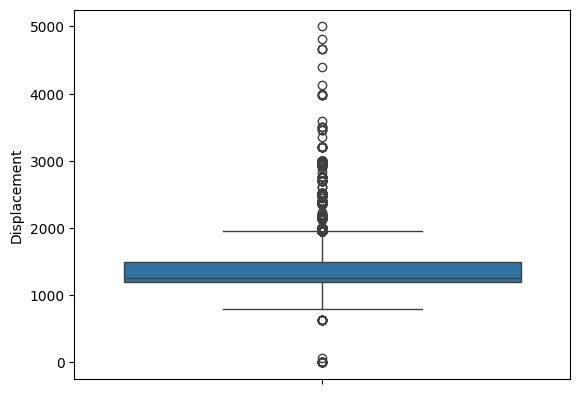

In [75]:
sns.boxplot(copy_cardekho['Displacement'])

In [80]:
#No of Cylinder

# Ensure you are working only with numerical columns
numeric_columns = copy_cardekho.select_dtypes(include=['number'])


# Preparing Data
X_train = numeric_columns[numeric_columns['No of Cylinder'].notna()].drop(['No of Cylinder'], axis=1)
y_train = numeric_columns[numeric_columns['No of Cylinder'].notna()]['No of Cylinder']
X_test = numeric_columns[numeric_columns['No of Cylinder'].isna()].drop(['No of Cylinder'], axis=1)

# Train HistGradientBoostingRegressor model
hist_gb = HistGradientBoostingClassifier()
hist_gb.fit(X_train, y_train)

# Predict missing Torque values
y_pred = hist_gb.predict(X_test)

# Fill missing values with predictions
copy_cardekho.loc[copy_cardekho['No of Cylinder'].isnull(), 'No of Cylinder'] = y_pred
copy_cardekho['No of Cylinder'].isna().sum()

np.int64(0)

<Axes: ylabel='No of Cylinder'>

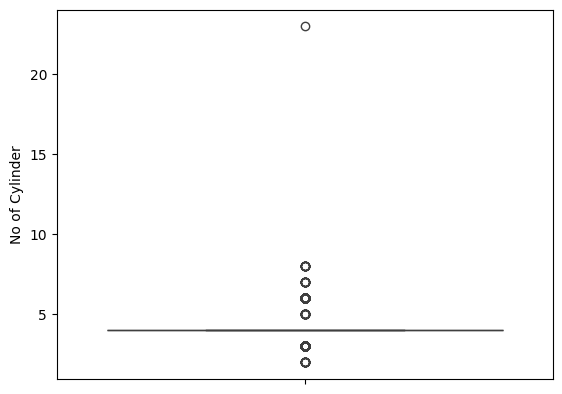

In [81]:
#outlier
sns.boxplot(copy_cardekho['No of Cylinder'])

10
2.021871150039327


<Axes: ylabel='No of Cylinder'>

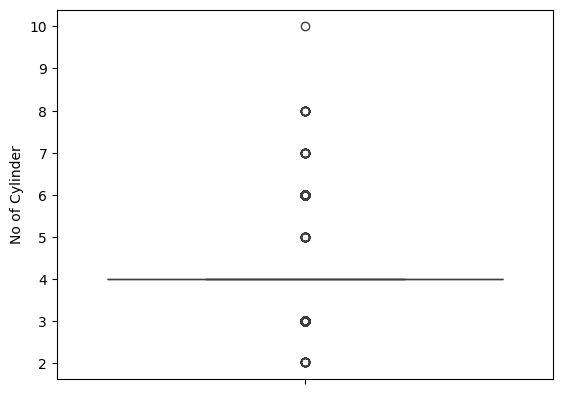

In [82]:
# Capping the 'No of Cylinder' column at a reasonable maximum value (e.g., 12)
upper_limit = 10
lower_limit=copy_cardekho['No of Cylinder'].mean()-3*copy_cardekho['No of Cylinder'].std()
print(upper_limit)
print(lower_limit)
copy_cardekho['No of Cylinder']=np.where(copy_cardekho['No of Cylinder']>upper_limit,upper_limit,copy_cardekho['No of Cylinder'])
copy_cardekho['No of Cylinder']=np.where(copy_cardekho['No of Cylinder']<lower_limit,lower_limit,copy_cardekho['No of Cylinder'])

copy_cardekho['No of Cylinder']=copy_cardekho['No of Cylinder'].astype(int)
sns.boxplot(copy_cardekho['No of Cylinder'])

In [ ]:
#Gear Box

# Ensure you are working only with numerical columns
numeric_columns = copy_cardekho.select_dtypes(include=['number'])


# Preparing Data
X_train = numeric_columns[numeric_columns['Gear Box'].notna()].drop(['Gear Box'], axis=1)
y_train = numeric_columns[numeric_columns['Gear Box'].notna()]['Gear Box']
X_test = numeric_columns[numeric_columns['Gear Box'].isna()].drop(['Gear Box'], axis=1)

# Train HistGradientBoostingRegressor model
hist_gb = HistGradientBoostingClassifier()
hist_gb.fit(X_train, y_train)

# Predict missing Torque values
y_pred = hist_gb.predict(X_test)

# Fill missing values with predictions
copy_cardekho.loc[copy_cardekho['Gear Box'].isnull(), 'Gear Box'] = y_pred

copy_cardekho['Gear Box'].isna().sum()

3.430339939886794
77.0


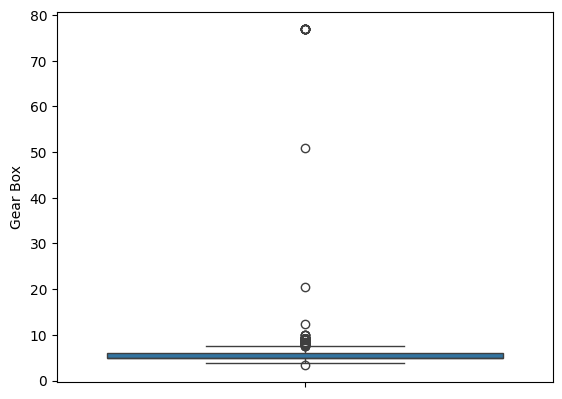

In [84]:
sns.boxplot(copy_cardekho['Gear Box'])
print(copy_cardekho['Gear Box'].min())
print(copy_cardekho['Gear Box'].max())

10
-2.5425272389383426


<Axes: ylabel='Gear Box'>

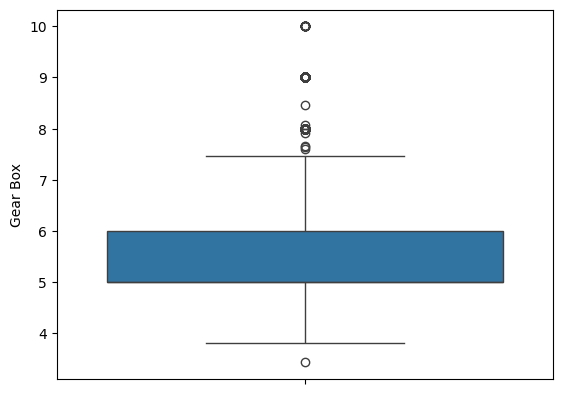

In [85]:
upper_limit = 10
lower_limit=copy_cardekho['Gear Box'].mean()-3*copy_cardekho['Gear Box'].std()
print(upper_limit)
print(lower_limit)
copy_cardekho['Gear Box']=np.where(copy_cardekho['Gear Box']>upper_limit,upper_limit,copy_cardekho['Gear Box'])
copy_cardekho['Gear Box']=np.where(copy_cardekho['Gear Box']<lower_limit,lower_limit,copy_cardekho['Gear Box'])
copy_cardekho['Gear Box'].describe()
sns.boxplot(copy_cardekho['Gear Box'])

In [86]:
#No Door Numbers

doors={'Tata Nexon EV Max':5,'Maruti Estilo':5,'Nissan Kicks':5,'Maruti FRONX':5,'Ford Endeavour':5,'Tata Nexon EV Max':5,'Tata Nexon EV':5,'BMW 3 Series Gran Limousine':4,'Ambassador':4}
copy_cardekho['No Door Numbers']=copy_cardekho['No Door Numbers'].fillna(copy_cardekho['model'].map(doors))

copy_cardekho['No Door Numbers'].isna().sum()

np.int64(0)

2.0
6.0


<Axes: ylabel='No Door Numbers'>

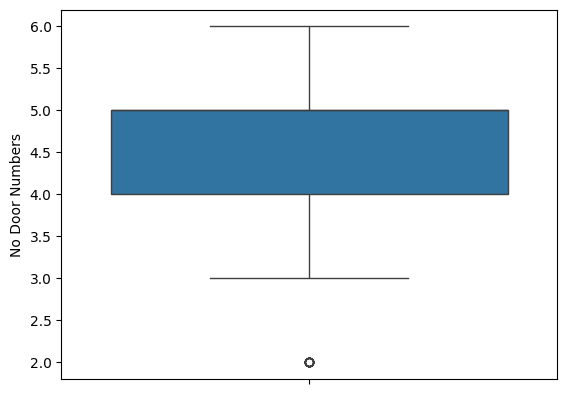

In [89]:
print(copy_cardekho['No Door Numbers'].min())
print(copy_cardekho['No Door Numbers'].max())

sns.boxplot(copy_cardekho['No Door Numbers'])

(array([8.039e+03, 2.070e+02, 2.200e+01, 7.000e+00, 0.000e+00, 2.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([2.01610000e+04, 4.16814490e+06, 8.31612880e+06, 1.24641127e+07,
        1.66120966e+07, 2.07600805e+07, 2.49080644e+07, 2.90560483e+07,
        3.32040322e+07, 3.73520161e+07, 4.15000000e+07]),
 <BarContainer object of 10 artists>)

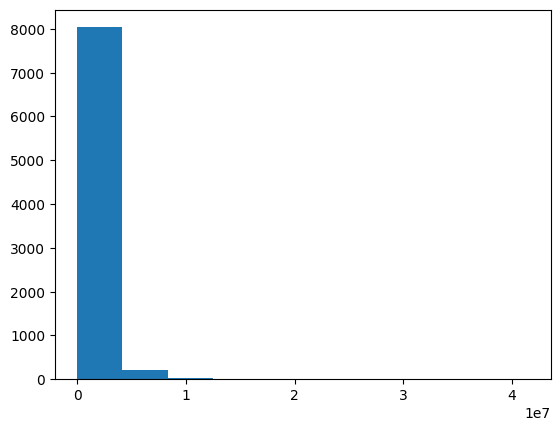

In [92]:
#price
plt.hist(copy_cardekho['price'])

<Axes: ylabel='price'>

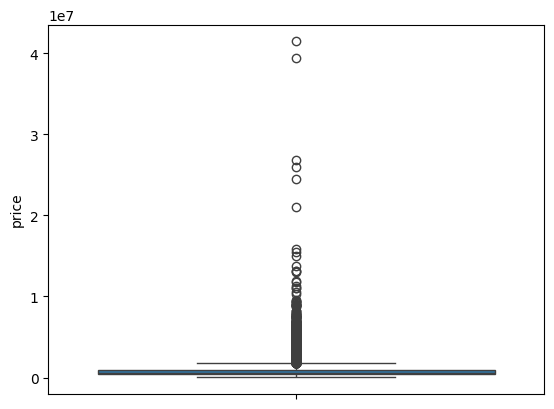

In [93]:
sns.boxplot(copy_cardekho['price'])

In [96]:
print(copy_cardekho['price'].min())
print(copy_cardekho['price'].max())
copy_cardekho['price'].to_list()

20161.0
41500000.0


[400000.0,
 811000.0,
 585000.0,
 462000.0,
 790000.0,
 1900000.0,
 345000.0,
 1200000.0,
 960000.0,
 585000.0,
 690000.0,
 682000.0,
 825000.0,
 595000.0,
 690000.0,
 1350000.0,
 5595000.0,
 521000.0,
 1005000.0000000001,
 775000.0,
 2200000.0,
 582000.0,
 1090000.0,
 457000.0,
 4900000.0,
 550000.0,
 570000.0,
 220000.00000000003,
 4145000.0000000005,
 861000.0,
 1785000.0000000002,
 802999.9999999999,
 2565000.0,
 674000.0,
 349000.0,
 1050000.0,
 4425000.0,
 405999.99999999994,
 4965000.0,
 1100000.0,
 1100000.0,
 594000.0,
 710000.0,
 692000.0,
 650000.0,
 2089999.9999999998,
 411000.00000000006,
 650000.0,
 3675000.0,
 610000.0,
 1675000.0,
 530000.0,
 7990000.000000001,
 250000.0,
 715000.0,
 3500000.0,
 2250000.0,
 625000.0,
 2695000.0,
 650000.0,
 550000.0,
 825000.0,
 220000.00000000003,
 428000.0,
 695000.0,
 930000.0000000001,
 455000.0,
 1195000.0,
 2175000.0,
 442000.0,
 690000.0,
 500000.0,
 3395000.0000000005,
 650000.0,
 537000.0,
 750000.0,
 1789999.9999999998,
 46800

<Axes: ylabel='price'>

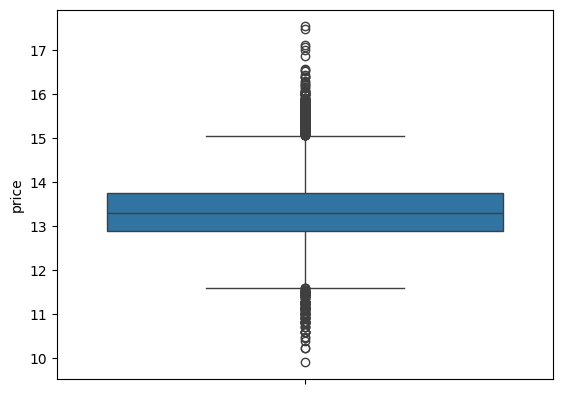

In [97]:
# Assuming df is your DataFrame and 'price' is the column you want to transform
copy_cardekho['price']= np.log(copy_cardekho['price'] + 1)  # Adding 1 to avoid log(0)

sns.boxplot(copy_cardekho['price'])

In [104]:
print(copy_cardekho['km'].isna().sum())
copy_cardekho['km'].sort_values(ascending=True).to_list()


0


[0.0,
 0.0,
 101.0,
 150.0,
 170.0,
 200.0,
 300.0,
 300.0,
 400.0,
 411.0,
 413.0,
 500.0,
 600.0,
 600.0,
 787.0,
 950.0,
 1000.0,
 1000.0,
 1062.0,
 1200.0,
 1200.0,
 1200.0,
 1330.0,
 1457.0,
 1500.0,
 1500.0,
 1500.0,
 1600.0,
 1700.0,
 1782.0,
 1870.0,
 1900.0,
 1989.0,
 2000.0,
 2000.0,
 2000.0,
 2045.0,
 2054.0,
 2177.0,
 2179.0,
 2236.0,
 2300.0,
 2373.0,
 2486.0,
 2500.0,
 2501.0,
 2565.0,
 2657.0,
 2700.0,
 2704.0,
 2707.0,
 2900.0,
 2997.0,
 3000.0,
 3000.0,
 3000.0,
 3000.0,
 3000.0,
 3000.0,
 3000.0,
 3089.0,
 3100.0,
 3106.0,
 3115.0,
 3120.0,
 3188.0,
 3200.0,
 3228.0,
 3300.0,
 3500.0,
 3500.0,
 3500.0,
 3500.0,
 3500.0,
 3721.0,
 3800.0,
 3800.0,
 3819.0,
 3844.0,
 3989.0,
 4000.0,
 4000.0,
 4000.0,
 4000.0,
 4000.0,
 4000.0,
 4034.0,
 4066.0,
 4100.0,
 4108.0,
 4135.0,
 4140.0,
 4187.0,
 4200.0,
 4259.0,
 4437.0,
 4437.0,
 4453.0,
 4495.0,
 4521.0,
 4527.0,
 4545.0,
 4564.0,
 4600.0,
 4603.0,
 4605.0,
 4732.0,
 4764.0,
 4786.0,
 4900.0,
 4900.0,
 4914.0,
 4939.0,
 49

In [107]:
# Replace all 0 values in 'km' column with 101
copy_cardekho['km'] = copy_cardekho['km'].replace(0, 150)
upper_limit = 260000
lower_limit=copy_cardekho['km'].mean()-3*copy_cardekho['km'].std()
print(upper_limit)
print(lower_limit)
copy_cardekho['km']=np.where(copy_cardekho['km']>upper_limit,upper_limit,copy_cardekho['km'])
copy_cardekho['km']=np.where(copy_cardekho['km']<lower_limit,lower_limit,copy_cardekho['km'])
copy_cardekho['km'].describe()

260000
-45921.46800717859


count      8281.000000
mean      57862.810409
std       34594.759472
min         101.000000
25%       30000.000000
50%       53700.000000
75%       80000.000000
max      260000.000000
Name: km, dtype: float64

<Axes: ylabel='km'>

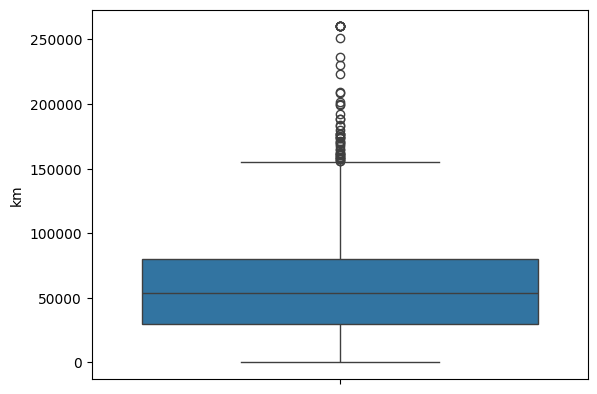

In [106]:
sns.boxplot(copy_cardekho['km'])

In [110]:

# Create new feature 'Car_Age'
copy_cardekho['Car_Age']=pd.Timestamp.now().year - copy_cardekho['modelYear']
copy_cardekho['Car_Age']

0        9
1        6
2        6
3       10
4        9
        ..
8364     2
8365    10
8366    13
8367    12
8368     7
Name: Car_Age, Length: 8281, dtype: int64

0


<Axes: ylabel='km'>

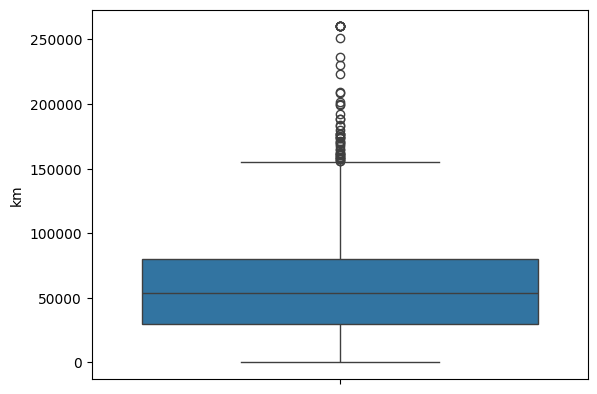

In [114]:
print(copy_cardekho['Car_Age'].isna().sum())
sns.boxplot(copy_cardekho['km'])

<Axes: >

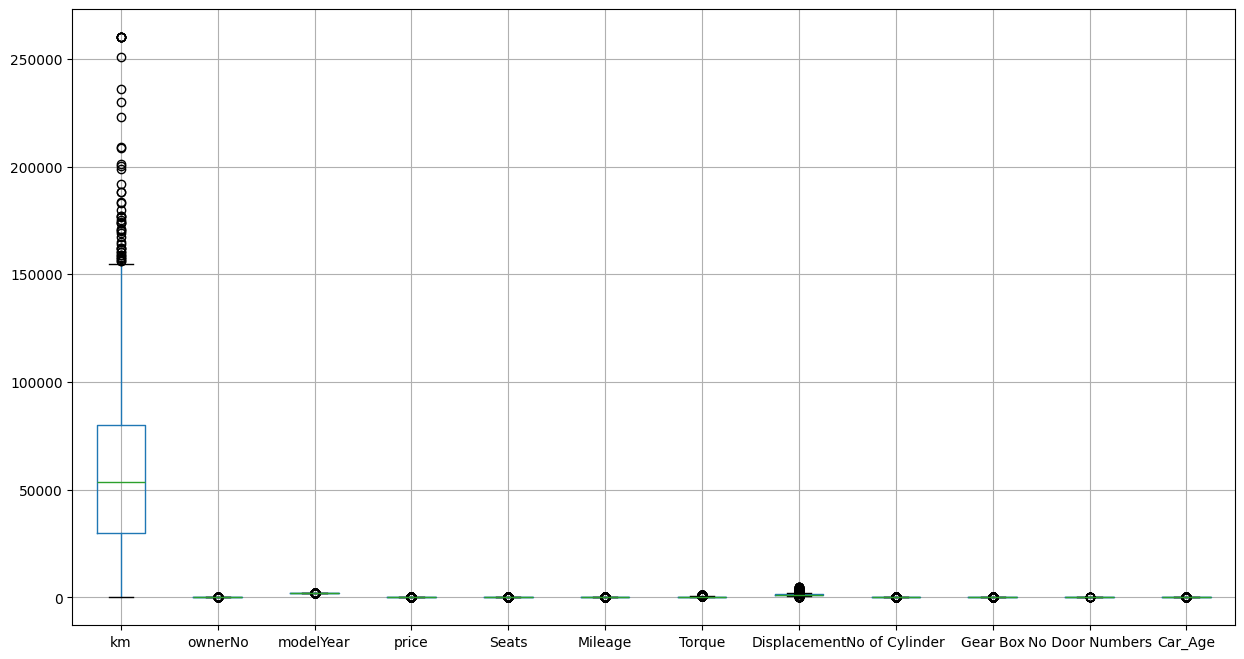

In [115]:
#after removing outlier
copy_cardekho.boxplot(figsize=(15,8))

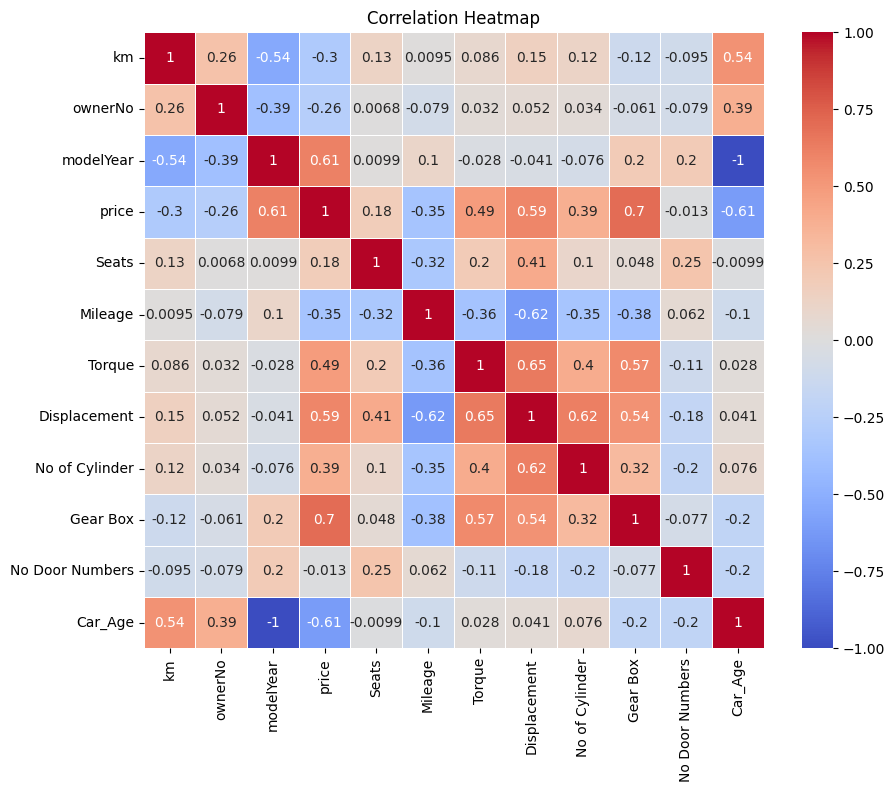

price              1.000000
Gear Box           0.695702
modelYear          0.612775
Displacement       0.590478
Torque             0.491883
No of Cylinder     0.386756
Seats              0.184785
No Door Numbers   -0.012656
ownerNo           -0.258785
km                -0.304358
Mileage           -0.353561
Car_Age           -0.612775
Name: price, dtype: float64


In [116]:
# Select numerical columns and compute the correlation matrix
correlation = copy_cardekho.select_dtypes(include=['number']).corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Extract the correlation of 'price' with other numerical features
correlation_with_price = correlation['price'].sort_values(ascending=False)
print(correlation_with_price)


Correlation check for numerical values

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_3180\2721259008.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_price.index, y=correlation_with_price.values, palette='viridis')


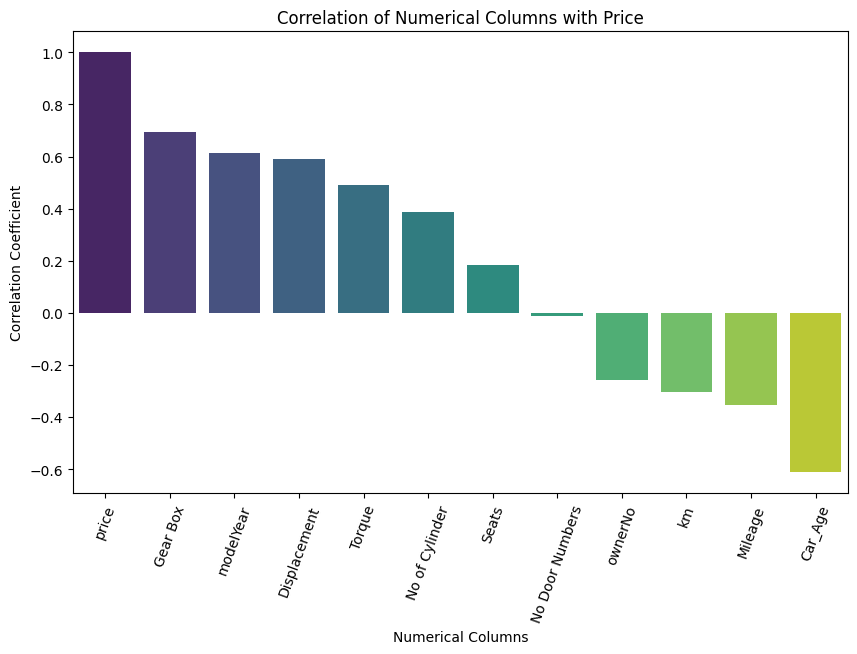

In [117]:
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_price.index, y=correlation_with_price.values, palette='viridis')
plt.title('Correlation of Numerical Columns with Price')
plt.xlabel('Numerical Columns')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=70)
plt.show()

In [123]:
copy_cardekho.drop(['Seats','No Door Numbers','No of Cylinder','ownerNo','Mileage'],axis=1, inplace=True)
numeric_columns=copy_cardekho.select_dtypes(include=['number'])
print(numeric_columns.isna().sum())
copy_cardekho.head(1)

km              0
modelYear       0
price           0
Torque          0
Displacement    0
Gear Box        0
Car_Age         0
dtype: int64


,ft,bt,km,transmission,oem,model,modelYear,variantName,price,Insurance Validity,RTO,Torque,Color,Engine Type,Displacement,Fuel Suppy System,Turbo Charger,Super Charger,Gear Box,Drive Type,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,location,Car_Age
0,Petrol,Hatchback,120000.0,Manual,Maruti,Maruti Celerio,2015,VXI,12.899222,Third Party insurance,KA51,110.0,White,K10B Engine,998.0,MPFi,No,No,5.0,FWD,Power,Ventilated Disc,Drum,"Tubeless, Radial",banglore,9


Categorical columns

In [124]:
copy_cardekho.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8281 entries, 0 to 8368
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ft                  8281 non-null   object 
 1   bt                  8277 non-null   object 
 2   km                  8281 non-null   float64
 3   transmission        8281 non-null   object 
 4   oem                 8281 non-null   object 
 5   model               8281 non-null   object 
 6   modelYear           8281 non-null   int64  
 7   variantName         8281 non-null   object 
 8   price               8281 non-null   float64
 9   Insurance Validity  8277 non-null   object 
 10  RTO                 7407 non-null   object 
 11  Torque              8281 non-null   float64
 12  Color               8278 non-null   object 
 13  Engine Type         7991 non-null   object 
 14  Displacement        8281 non-null   float64
 15  Fuel Suppy System   6573 non-null   object 
 16  Turbo Charg

In [128]:
categorical_columns=copy_cardekho.select_dtypes(include=['object'])
print(categorical_columns.columns)
categorical_columns.head(2)

Index(['ft', 'bt', 'transmission', 'oem', 'model', 'variantName',
       'Insurance Validity', 'RTO', 'Color', 'Engine Type',
       'Fuel Suppy System', 'Turbo Charger', 'Super Charger', 'Drive Type',
       'Steering Type', 'Front Brake Type', 'Rear Brake Type', 'Tyre Type',
       'location'],
      dtype='object')


,ft,bt,transmission,oem,model,variantName,Insurance Validity,RTO,Color,Engine Type,Fuel Suppy System,Turbo Charger,Super Charger,Drive Type,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,location
0,Petrol,Hatchback,Manual,Maruti,Maruti Celerio,VXI,Third Party insurance,KA51,White,K10B Engine,MPFi,No,No,FWD,Power,Ventilated Disc,Drum,"Tubeless, Radial",banglore
1,Petrol,SUV,Manual,Ford,Ford Ecosport,1.5 Petrol Titanium BSIV,Comprehensive,KA05,White,Ti-VCT Petrol Engine,Direct Injection,No,No,FWD,Power,Ventilated Disc,Drum,"Tubeless,Radial",banglore


In [129]:
print(categorical_columns.isna().sum())

ft                       0
bt                       4
transmission             0
oem                      0
model                    0
variantName              0
Insurance Validity       4
RTO                    874
Color                    3
Engine Type            290
Fuel Suppy System     1708
Turbo Charger         1029
Super Charger         1938
Drive Type            1540
Steering Type          254
Front Brake Type        96
Rear Brake Type         96
Tyre Type               77
location                 0
dtype: int64


In [130]:
#RTO 
copy_cardekho['RTO'].unique()

array(['KA51', 'KA05', 'KA03', 'KA53', 'KA04', nan, 'KA01', 'OD02',
       'KA41', 'KA02', 'HR26', 'WB38', 'KA47', 'KA19', 'KA50', 'KA09',
       'PY01', 'KA66', 'KA20', 'KA52', 'KA25', 'KA27', 'TN09', 'KA13',
       'MH46', 'KA42', 'KA12', 'KL07', 'KA55', 'KA07', 'KA17', 'KA16',
       'TN33', 'KA06', 'KA22', 'KA14', 'KA35', 'KA21', 'KA32', 'KL24',
       'KA63', 'KA26', 'KA11', 'KA36', 'KA40', 'KA18', 'DL14', 'UP32',
       'KA34', 'KA45', 'AP39', 'DL8C', 'MH48', 'TN14', 'MH03', 'TN10',
       'WB26', 'WB08', 'MH31', 'KL60', 'WB12', 'VK28', 'UP16', 'KL58',
       'MP20', 'KA59', 'KA68', 'KA31', 'UP14', 'GJ06', 'UP70', 'DL03',
       'AP28', 'HR51', 'RJ05', 'HR13', 'CH01', 'MH04', 'JH01', 'KA33',
       'TS07', 'TN02', 'TN04', 'TN22', 'TN11', 'TN06', 'TN05', 'TN07',
       'TN19', 'TN01', 'TN24', 'TN18', 'TN03', 'TN12', 'TN63', 'TN13',
       'TN42', 'TN91', 'TN29', 'TN77', 'TN23', 'TN57', 'TN87', 'TN49',
       'TN20', 'TN90', 'TN47', 'TN85', 'KL22', 'UP57', 'TN81', 'TN15',
       'T

In [131]:
# Function to map RTO values
def map_rto(rto):
    if pd.isna(rto):
        return 'Unknown'
    rto_alpha = ''.join([char for char in str(rto) if char.isalpha()])  # Extract only letters
    return rto_alpha

copy_cardekho['RTO'] = copy_cardekho['RTO'].apply(map_rto)
copy_cardekho['RTO'].unique()

array(['KA', 'Unknown', 'OD', 'HR', 'WB', 'PY', 'TN', 'MH', 'KL', 'DL',
       'UP', 'AP', 'DLC', 'VK', 'MP', 'GJ', 'RJ', 'CH', 'JH', 'TS', 'HP',
       'OR', 'TM', 'DLX', 'Up', 'UK', 'PH', 'Hr', 'DDL', 'PB', 'DLZ',
       'DLF', 'AS', 'DLV', 'DLP', 'Dl', 'DLU', 'CG', 'DLB', 'DLA', 'DD',
       'GA', 'TA', 'TT', 'KK', 'AA', 'TD', 'BH', 'HE', 'RR', 'RH', 'RC',
       'RJG', 'BRF', 'AR', 'Wb', 'wb', 'WW', 'AN', 'wB', 'BR'],
      dtype=object)

In [132]:
rto_mapping_updated = {
    'KA': 'Karnataka',
    'HR': 'Haryana',
    'WB': 'West Bengal',
    'TN': 'Tamil Nadu',
    'UP': 'Uttar Pradesh',
    'DL': 'Delhi',
    'MH': 'Maharashtra',
    'RJ': 'Rajasthan',
    'AP': 'Andhra Pradesh',
    'GJ': 'Gujarat',
    'OD': 'Odisha',
    'PY': 'Puducherry',
    'CH': 'Chandigarh',
    'JH': 'Jharkhand',
    'TS': 'Telangana',
    'HP': 'Himachal Pradesh',
    'UK': 'Uttarakhand',
    'MP': 'Madhya Pradesh',
    'PB': 'Punjab',
    'AS': 'Assam',
    'CG': 'Chhattisgarh',
    'GA': 'Goa',
    'BR': 'Bihar',
    'AN': 'Andaman and Nicobar Islands',
    'AR': 'Arunachal Pradesh',
    'VK': 'Unknown',
    'TM': 'Tamil Nadu',  # Assumed
    'DLC': 'Delhi',
    'DLX': 'Delhi',
    'DLZ': 'Delhi',
    'DLF': 'Delhi',
    'DLP': 'Delhi',
    'DLU': 'Delhi',
    'DLB': 'Delhi',
    'DLA': 'Delhi',
    'DDL': 'Delhi',
    'Up': 'Uttar Pradesh',
    'PH': 'Unknown',
    'HE': 'Unknown',
    'RR': 'Unknown',
    'RH': 'Unknown',
    'RC': 'Unknown',
    'TT': 'Unknown',
    'TA': 'Unknown',
    'KK': 'Unknown',
    'AA': 'Unknown',
    'TD': 'Unknown',
    'RJG': 'Rajasthan',
    'BRF': 'Bihar',
    'WW': 'Unknown',
    'wB': 'West Bengal',
    'Wb': 'West Bengal',
    'wb': 'West Bengal',
    'Unknown': 'Unknown'
}

# Applying the updated mapping to the RTO column
copy_cardekho['RTO'] = copy_cardekho['RTO'].map(rto_mapping_updated).fillna('Unknown')
copy_cardekho['RTO'].unique()


array(['Karnataka', 'Unknown', 'Odisha', 'Haryana', 'West Bengal',
       'Puducherry', 'Tamil Nadu', 'Maharashtra', 'Delhi',
       'Uttar Pradesh', 'Andhra Pradesh', 'Madhya Pradesh', 'Gujarat',
       'Rajasthan', 'Chandigarh', 'Jharkhand', 'Telangana',
       'Himachal Pradesh', 'Uttarakhand', 'Punjab', 'Assam',
       'Chhattisgarh', 'Goa', 'Bihar', 'Arunachal Pradesh',
       'Andaman and Nicobar Islands'], dtype=object)

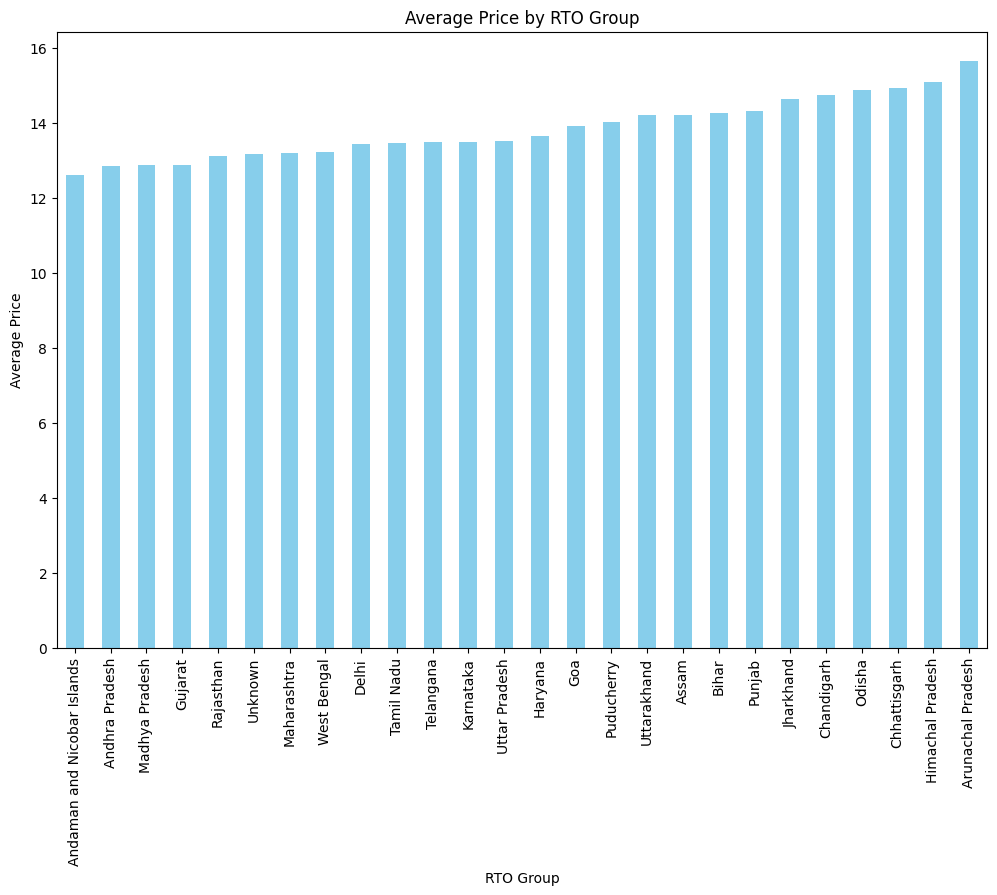

In [135]:
plt.figure(figsize=(12, 8))
average_prices = copy_cardekho.groupby('RTO')['price'].mean().sort_values()
average_prices.plot(kind='bar', color='skyblue')
plt.xticks(rotation=90)
plt.title('Average Price by RTO Group')
plt.xlabel('RTO Group')
plt.ylabel('Average Price')
plt.show()

In [136]:
# Tyre Type

print('null values:',copy_cardekho['Tyre Type'].isna().sum())
print('unique values:',copy_cardekho['Tyre Type'].unique())
print('unique value and its occurance:',copy_cardekho['Tyre Type'].value_counts())
print('no of unique elements:',copy_cardekho['Tyre Type'].nunique())

null values: 77
unique values: ['Tubeless, Radial' 'Tubeless,Radial' 'Tubeless' 'Radial, Tubless'
 'Radial' 'Tubeless,Radial ' 'Radial, Tubeless' 'Tubeless Radial Tyres'
 'Tubeless Tyres' 'Tubeless,Runflat' 'Runflat Tyres' nan 'Run-Flat'
 'Tubless, Radial' 'Runflat Tyre' 'Radial,Tubeless' 'Tubeless, Runflat'
 'Tubeless Tyres, Radial' 'Runflat' 'Tubeless,Radials' 'Tubeless. Runflat'
 'Radial with tube' 'Tubless,Radial' 'Radial Tubeless' 'Tubeless Radial'
 'tubeless tyre' 'Tubeless Tyre' 'Tubeless ' 'Radial Tyres'
 'Tubeless Tyres Mud Terrain' 'Runflat,Radial'
 'Tubeless Tyres All Terrain' 'Tubeless Radials Tyre' 'Radial '
 'Tubeless, Radials']
unique value and its occurance: Tyre Type
Tubeless,Radial               4380
Tubeless, Radial              1391
Tubeless                      1158
Tubeless Tyres                 422
Radial, Tubeless               226
Radial                         131
Radial, Tubless                 82
Tubeless Tyres, Radial          61
Radial,Tubeless            

The data appears to be imbalanced, with a significant majority of instances belonging to the "Tubeless, Radial" category (2939 instances). This imbalance can lead to bias in the ML model

In [137]:
# Drop the columns
copy_cardekho.drop('Tyre Type',axis=1,inplace=True)

In [138]:
# Rear Brake Type

print('null values:',copy_cardekho['Rear Brake Type'].isna().sum())
print('unique values:',copy_cardekho['Rear Brake Type'].unique())
print('unique value and its occurance:',copy_cardekho['Rear Brake Type'].value_counts())
print('no of unique elements:',copy_cardekho['Rear Brake Type'].nunique())

null values: 96
unique values: ['Drum' 'Solid Disc' 'Discs' 'Disc & Caliper Type' 'Disc'
 'Ventilated discs' 'Ventilated Disc' 'Leading-Trailing Drum'
 'ventilated disc' 'self adjusting drums' nan 'Self Adjusting Drum'
 'Drums 180 mm' 'Drums' 'Self-Adjusting Drum' 'Ventilated Discs'
 'Electric Parking Brake' 'Booster assisted drum'
 'Leading & Trailing Drum' 'disc' 'drum' 'Disc & Drum' 'Drum '
 'Ventilated Drum' 'Drum`' 'Ventilated Disc ' 'solid disc' 'Drum in Discs'
 'Solid Disc ' 'Vacuum assisted hydraulic dual circuit w'
 'Self Adjusting Drums' 'Mechanical-hydraulic dual circuit'
 'Ventialte Disc' 'Disc ' 'Drum in disc'
 '228.6 mm dia, drums on rear wheels']
unique value and its occurance: Rear Brake Type
Drum                                        6378
Disc                                        1179
Ventilated Disc                              195
Solid Disc                                   122
Discs                                         84
Disc & Caliper Type                  

In [139]:
# Drop the columns
copy_cardekho.drop('Rear Brake Type',axis=1,inplace=True)

In [140]:
# Front Brake Type

print('null values:',copy_cardekho['Front Brake Type'].isna().sum())
print('unique values:',copy_cardekho['Front Brake Type'].unique())
print('unique value and its occurance:',copy_cardekho['Front Brake Type'].value_counts())
print('no of unique elements:',copy_cardekho['Front Brake Type'].nunique())

null values: 96
unique values: ['Ventilated Disc' 'Disc' 'Disc ' ' Disc' 'Disc & Caliper Type'
 'Ventilated discs' 'Ventilated Discs' 'Ventilated Disc ' nan
 'ventilated Disc' 'Disc, 236 mm' 'Multilateral Disc' 'Solid Disc' 'Disk'
 'Drum' 'Electric Parking Brake' 'Ventilated DIsc' ' Ventilated Disc'
 'Booster assisted ventilated disc' 'disc' 'Ventilated Disk'
 'Vantilated Disc' 'ABS' 'Ventlated Disc' 'Caliper Ventilated Disc'
 'solid disc' 'Disc,internally ventilated '
 'Vacuum assisted hydraulic dual circuit w'
 'Mechanical-hydraulic dual circuit' 'Ventillated Disc' 'ventilated disc'
 'Ventilated disc' 'Discs' 'Tandem master cylinder with Servo assist'
 'Disc brakes']
unique value and its occurance: Front Brake Type
Disc                                        5266
Ventilated Disc                             2533
Disc                                          73
Ventilated Discs                              64
Solid Disc                                    63
Disc & Caliper Type         

In [141]:
# Drop the columns
copy_cardekho.drop('Front Brake Type',axis=1,inplace=True)

In [142]:
#Steering Type

print('null values:',copy_cardekho['Steering Type'].isna().sum())
print('unique values:',copy_cardekho['Steering Type'].unique())
print('unique value and its occurance:',copy_cardekho['Steering Type'].value_counts())
print('no of unique elements:',copy_cardekho['Steering Type'].nunique())

null values: 254
unique values: ['Power' 'power' nan 'Electric' 'electric' 'EPAS' 'Electrical'
 'Electronic' 'Manual' 'Hydraulic']
unique value and its occurance: Steering Type
Power         6328
Electric      1423
Electronic     104
Manual          83
Electrical      48
power           29
EPAS             9
Hydraulic        2
electric         1
Name: count, dtype: int64
no of unique elements: 9


In [143]:
# Drop the columns
copy_cardekho.drop('Steering Type',axis=1,inplace=True)

In [144]:
# Drive Type

print('null values:',copy_cardekho['Drive Type'].isna().sum())
print('unique values:',copy_cardekho['Drive Type'].unique())
print('unique value and its occurance:',copy_cardekho['Drive Type'].value_counts())
print('no of unique elements:',copy_cardekho['Drive Type'].nunique())

null values: 1540
unique values: ['FWD' 'FWD ' '4X2' 'AWD' nan 'RWD' '4x2' '2WD' '4WD' '2 WD'
 'Front Wheel Drive' 'Rear Wheel Drive with ESP' '4X4' 'Two Wheel Drive'
 '2WD ' 'All Wheel Drive' '4x4' 'AWD INTEGRATED MANAGEMENT'
 'RWD(with MTT)' 'Permanent all-wheel drive quattro' '4 WD']
unique value and its occurance: Drive Type
FWD                                  5450
RWD                                   413
AWD                                   280
2WD                                   158
4WD                                   142
4X2                                    68
2 WD                                   46
Front Wheel Drive                      42
4X4                                    41
FWD                                    34
4x2                                    18
Two Wheel Drive                        15
4x4                                    11
All Wheel Drive                         7
Rear Wheel Drive with ESP               6
RWD(with MTT)                          

In [145]:
# Drop the columns
copy_cardekho.drop('Drive Type',axis=1,inplace=True)

In [146]:
# Super Charger

print('null values:',copy_cardekho['Super Charger'].isna().sum())
print('unique values:',copy_cardekho['Super Charger'].unique())
print('unique value and its occurance:',copy_cardekho['Super Charger'].value_counts())
print('no of unique elements:',copy_cardekho['Super Charger'].nunique())

null values: 1938
unique values: ['No' nan 'Yes' 'yes' 'NO' 'no']
unique value and its occurance: Super Charger
No     6323
Yes      14
yes       3
NO        2
no        1
Name: count, dtype: int64
no of unique elements: 5


In [147]:
# Drop the columns
copy_cardekho.drop('Super Charger',axis=1,inplace=True)

In [148]:
# Turbo Charger

copy_cardekho['Turbo Charger'] = copy_cardekho['Turbo Charger'].apply(lambda x: str(x).lower())
print('null values:',copy_cardekho['Turbo Charger'].isna().sum())
print('unique values:',copy_cardekho['Turbo Charger'].unique())
print('unique value and its occurance:',copy_cardekho['Turbo Charger'].value_counts())
print('no of unique elements:',copy_cardekho['Turbo Charger'].nunique())

null values: 0
unique values: ['no' 'yes' 'nan' 'twin' 'turbo']
unique value and its occurance: Turbo Charger
no       4211
yes      2986
nan      1029
twin       53
turbo       2
Name: count, dtype: int64
no of unique elements: 5


In [149]:
turbo_fill={'no':'NO','yes':'YES','nan':'NO','twin':'YES','turbo':'YES'}
copy_cardekho['Turbo Charger'] = copy_cardekho['Turbo Charger'].map(turbo_fill).fillna('NO')

print('null values:',copy_cardekho['Turbo Charger'].isna().sum())
print('unique values:',copy_cardekho['Turbo Charger'].unique())
print('unique value and its occurance:',copy_cardekho['Turbo Charger'].value_counts())
print('no of unique elements:',copy_cardekho['Turbo Charger'].nunique())

null values: 0
unique values: ['NO' 'YES']
unique value and its occurance: Turbo Charger
NO     5240
YES    3041
Name: count, dtype: int64
no of unique elements: 2


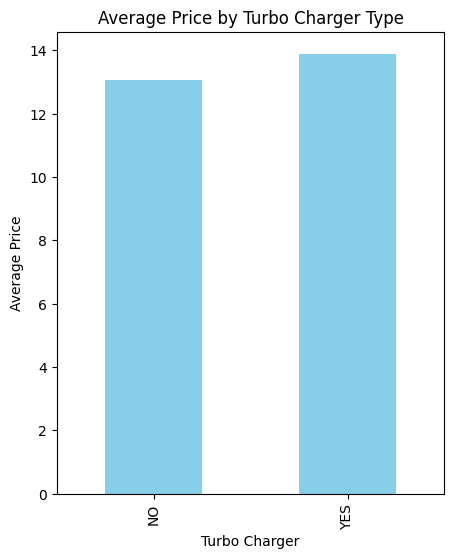

In [151]:
plt.figure(figsize=(5, 6))
average_prices = copy_cardekho.groupby('Turbo Charger')['price'].mean().sort_values()
average_prices.plot(kind='bar', color='skyblue')
plt.xticks(rotation=90)
plt.title('Average Price by Turbo Charger Type')
plt.xlabel('Turbo Charger')
plt.ylabel('Average Price')
plt.show()

In [152]:
# Fuel Suppy System

print('null values:',copy_cardekho['Fuel Suppy System'].isna().sum())
print('unique values:',copy_cardekho['Fuel Suppy System'].unique())
print('unique value and its occurance:',copy_cardekho['Fuel Suppy System'].value_counts())
print('no of unique elements:',copy_cardekho['Fuel Suppy System'].nunique())

null values: 1708
unique values: ['MPFi' 'Direct Injection' nan 'CRDI' 'Electronic Injection System' 'GDi'
 'MPFI' 'PGM - Fi' 'Direct Injection ' 'PGM-Fi' 'CRDi'
 'Multi Point Fuel Injection' 'MPFI+LPG' 'Common-Rail type'
 'Common Rail Direct Injection (dCi)' 'Multipoint Injection' 'CDI' 'PFI'
 'EFI(Electronic Fuel Injection)' 'MPFI ' 'EFI' 'Multi-point injection'
 'TSI' 'TDCi' 'Common rail direct injection'
 'PGM-FI (Programmed Fuel Injection)' 'Electronic Fuel Injection'
 'Common Rail Direct Injection' 'Common Rail' 'SEFI'
 'Multi point Fuel Injection' 'MPI' 'Gasoline Direct Injection' 'MPi'
 'Direct Injection Common Rail' '3 Phase AC Induction Motors' 'Dual VVT-i'
 'EFI (Electronic Fuel Injection)' 'SMPI' 'Indirect Injection'
 'common rail system' 'GDI' 'PGM-FI (Programmed Fuel Inje' 'DOHC' 'EGIS'
 'Mpfi' 'MFI' 'IDI' 'PGM-FI' 'Electronic Fuel Injection(EFI)' 'EFIC'
 'TFSI' 'EFi' 'Direct Injection Common Rail ' 'DEDST' 'TGDi' 'CRDI '
 'D-4S' 'CNG' 'Multipoint injection' 'Direct injec

In [153]:
copy_cardekho.drop('Fuel Suppy System',axis=1,inplace=True)

In [154]:
# variantName

print('null values:',copy_cardekho['variantName'].isna().sum())
print('unique value and its occurance:',copy_cardekho['variantName'].value_counts())
print('no of unique elements:',copy_cardekho['variantName'].nunique())

null values: 0
unique value and its occurance: variantName
VXI                    333
LXI                    145
Sportz                  96
VDI                     78
Magna                   77
                      ... 
Sharp 6-Str              1
1.6 SX Diesel            1
Petrol HSE Dynamic       1
Vxi 1.1                  1
HTK Plus Diesel iMT      1
Name: count, Length: 2157, dtype: int64
no of unique elements: 2157


In [155]:
copy_cardekho.drop('variantName',axis=1,inplace=True)

In [156]:
# model

print('null values:',copy_cardekho['model'].isna().sum())
print('unique value and its occurance:',copy_cardekho['model'].value_counts())
print('no of unique elements:',copy_cardekho['model'].nunique())

null values: 0
unique value and its occurance: model
Honda City              366
Maruti Swift            348
Hyundai i20             328
Maruti Baleno           292
Hyundai Grand i10       259
                       ... 
Volkswagen CrossPolo      1
Tata Sumo Victa           1
Mercedes-Benz AMG GT      1
Audi S5 Sportback         1
Jaguar F-TYPE             1
Name: count, Length: 315, dtype: int64
no of unique elements: 315


In [158]:
model_count=copy_cardekho['model'].value_counts()
# Define threshold
threshold = len(copy_cardekho) * 0.005
# Identify categories to keep and filter 
categories_to_keep_oem = model_count[model_count >= threshold].index
print(categories_to_keep_oem)
copy_cardekho = copy_cardekho[copy_cardekho['model'].isin(categories_to_keep_oem)]
copy_cardekho.shape

Index(['Honda City', 'Maruti Swift', 'Hyundai i20', 'Maruti Baleno',
       'Hyundai Grand i10', 'Maruti Wagon R', 'Maruti Swift Dzire',
       'Hyundai Creta', 'Hyundai i10', 'Hyundai Verna', 'Honda Amaze',
       'Ford Ecosport', 'Maruti Alto 800', 'Maruti Celerio', 'Renault KWID',
       'Volkswagen Polo', 'Mahindra XUV500', 'Maruti Ciaz', 'Honda Jazz',
       'Jeep Compass', 'Tata Tiago', 'Kia Seltos', 'Maruti Vitara Brezza',
       'Tata Nexon', 'Maruti Alto K10', 'Honda WR-V', 'Hyundai Venue',
       'Maruti Ertiga', 'Renault Duster', 'Hyundai EON', 'Skoda Rapid',
       'Volkswagen Vento', 'Ford Figo', 'Toyota Innova Crysta', 'Honda Brio',
       'Toyota Fortuner', 'Maruti Ignis', 'Hyundai Santro Xing',
       'Hyundai Grand i10 Nios', 'Mercedes-Benz C-Class', 'Toyota Innova',
       'Maruti Alto', 'Hyundai Xcent', 'Hyundai Santro', 'Maruti S-Presso',
       'Mercedes-Benz E-Class', 'MG Hector', 'Datsun RediGO', 'Maruti Ritz',
       'Renault Triber'],
      dtype='object', name

(5987, 18)

In [159]:
# oem

oem_counts=copy_cardekho['oem'].value_counts()
# Define threshold
threshold = len(copy_cardekho) * 0.005
# Identify categories to keep and filter 
categories_to_keep_oem = oem_counts[oem_counts >= threshold].index
print(categories_to_keep_oem)
copy_cardekho = copy_cardekho[copy_cardekho['oem'].isin(categories_to_keep_oem)]
copy_cardekho.shape

Index(['Maruti', 'Hyundai', 'Honda', 'Renault', 'Ford', 'Volkswagen', 'Tata',
       'Toyota', 'Mahindra', 'Mercedes-Benz', 'Jeep', 'Kia', 'Skoda', 'MG',
       'Datsun'],
      dtype='object', name='oem')


(5987, 18)

In [160]:
print('null values:',copy_cardekho['oem'].isna().sum())
print('unique value and its occurance:',copy_cardekho['oem'].value_counts())
print('no of unique elements:',copy_cardekho['oem'].nunique())

null values: 0
unique value and its occurance: oem
Maruti           2037
Hyundai          1511
Honda             795
Renault           261
Ford              229
Volkswagen        210
Tata              183
Toyota            176
Mahindra          127
Mercedes-Benz     104
Jeep              103
Kia                93
Skoda              66
MG                 46
Datsun             46
Name: count, dtype: int64
no of unique elements: 15


In [161]:
# ft

print('null values:',copy_cardekho['ft'].isna().sum())
print('unique value and its occurance:',copy_cardekho['ft'].value_counts())
print('no of unique elements:',copy_cardekho['ft'].nunique())

null values: 0
unique value and its occurance: ft
Petrol    4357
Diesel    1541
Cng         76
Lpg         13
Name: count, dtype: int64
no of unique elements: 4


In [162]:
copy_cardekho['ft']=copy_cardekho['ft'].replace('Cng','Gas')
copy_cardekho['ft']=copy_cardekho['ft'].replace('Lpg','Gas')

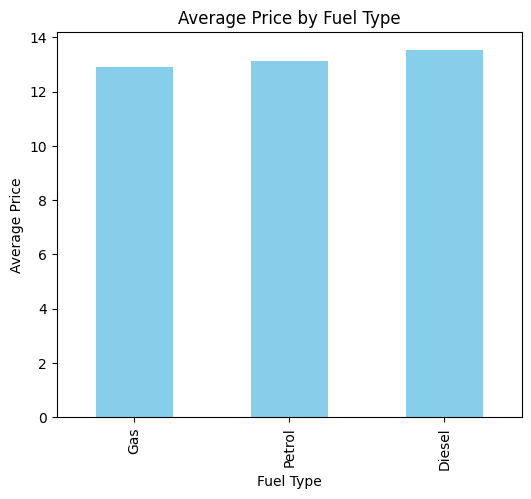

In [165]:
plt.figure(figsize=(6, 5))
average_prices = copy_cardekho.groupby('ft')['price'].mean().sort_values()
average_prices.plot(kind='bar', color='skyblue')
plt.xticks(rotation=90)
plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.show()


In [166]:
# bt

print('null values:',copy_cardekho['bt'].isna().sum())
print('unique value and its occurance:',copy_cardekho['bt'].value_counts())
print('no of unique elements:',copy_cardekho['bt'].nunique())

null values: 0
unique value and its occurance: bt
Hatchback       3163
Sedan           1384
SUV             1198
MUV              238
Convertibles       2
Wagon              1
Coupe              1
Name: count, dtype: int64
no of unique elements: 7


In [167]:
copy_cardekho.drop('bt',axis=1,inplace=True)

In [168]:
# Engine Type

copy_cardekho['Engine Type'].unique()

array(['K10B Engine', 'Ti-VCT Petrol Engine', 'Revotron Engine',
       'Kappa VTVT Petrol Engine', '2.0-Litre 4-Cyl Multijet II Engine',
       nan, 'k15B VVT Engine', 'VVT Petrol Engine',
       'i-VTEC Petrol Engine', 'mHawk Diesel Engine',
       'U2 CRDI Diesel Engine', '1.2l Turbocharged Revotron Engine',
       'i VTEC Engine', 'K Series Dual jet', '1.5L Petrol',
       '1.1 litre Petrol Engine', 'Bifuel Engine',
       'In-Line Petrol Engine', '2.0L Multijet Diesel',
       '1.2L Kappa Dual VTVT Petrol', 'K10B Petrol Engine',
       'K15 Smart Hybrid', 'In-Line Engine', '4 Cylinders In-line',
       'F8D Petrol Engine', 'Smartstream G1.4',
       '3.0 L in-line 6 cylinder engine', 'Petrol Engine',
       'Revotorq, 1.5L Turbocharged engine', 'K10C', 'Diesel Engine',
       'U2 CRDI VGT Engine', 'DDiS 190 Engine', 'DDIS 200 Engine',
       'K Series Petrol Engine', '1.0 l Turbo GDi petrol', 'SOHC i-VTEC',
       'TSi Petrol Engine ', 'U2 CRDi  Diesel Engine', 'IRDE2 Engine',
   

In [169]:
copy_cardekho.drop('Engine Type', axis=1,inplace=True)

In [170]:
# Insurance Validity

copy_cardekho['Insurance Validity'].unique()
copy_cardekho['Insurance Validity']=copy_cardekho['Insurance Validity'].replace('Third Party insurance','Third Party')
copy_cardekho['Insurance Validity'].value_counts()

Insurance Validity
Third Party      3245
Comprehensive    2306
Zero Dep          261
Not Available     169
1                   2
2                   1
Name: count, dtype: int64

In [171]:
copy_cardekho = copy_cardekho[~copy_cardekho['Insurance Validity'].isin(['1', '2'])]
copy_cardekho['Insurance Validity'].fillna('Not Available', inplace=True)
copy_cardekho['Insurance Validity'].value_counts()

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_3180\7395711.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  copy_cardekho['Insurance Validity'].fillna('Not Available', inplace=True)


Insurance Validity
Third Party      3245
Comprehensive    2306
Zero Dep          261
Not Available     172
Name: count, dtype: int64

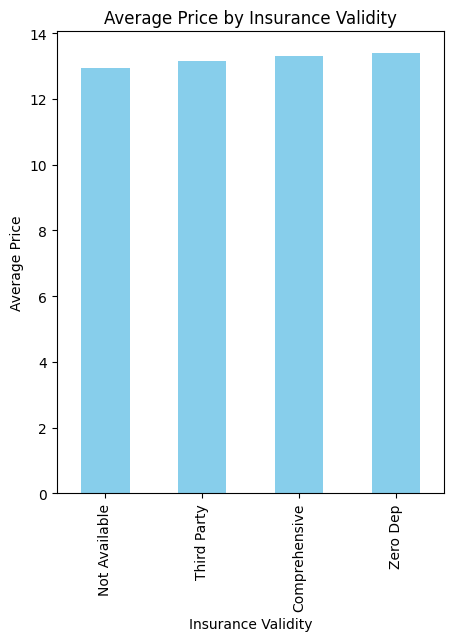

In [173]:
plt.figure(figsize=(5, 6))
average_prices = copy_cardekho.groupby('Insurance Validity')['price'].mean().sort_values()
average_prices.plot(kind='bar', color='skyblue')
plt.xticks(rotation=90)
plt.title('Average Price by Insurance Validity')
plt.xlabel('Insurance Validity')
plt.ylabel('Average Price')
plt.show()

In [175]:
#Color
copy_cardekho['Color'] = copy_cardekho['Color'].apply(lambda x: str(x).lower())
copy_cardekho['Color'].unique()

array(['white', 'red', 'others', 'maroon', 'orange', 'grey', 'silver',
       'blue', 'brown', 'yellow', 'black', 'gray', 'golden', 'green',
       'o purple', 'gold', 'titanium grey', 'modern steel metallic',
       'platinum white', 'golden brown', 'beige', 'star dust',
       'flash red', 'platinum white pearl', 'wine red', 'taffeta white',
       'minimal grey', 'fiery red', 'prime star gaze', 'tafeta white',
       'metall', 'met ecru beige', 'copper', 'titanium', 'chill',
       'purple', 'lunar silver metallic', 'silky silver',
       'premium amber metallic', 'r earth', 'orchid white pearl',
       'carnelian red pearl', 'berry red', 'alabaster silver metallic',
       'carbon steel', 'polar white', 'magma grey', 'dark red',
       'falsa colour', 'cherry', 'nexa blue', 'passion red',
       'galaxy blue', 'modern steel metal', 'burgundy red metallic',
       'magma gray', 'goldan brwoon', 'm grey', 'b red', 'granite grey',
       'urban titanim', 'g brown', 'a silver', 'radian

In [176]:
color_dict = {
    'white': 'White',
    'red': 'Red',
    'others': 'Other',
    'gray': 'Gray',
    'grey': 'Gray',
    'maroon': 'Other',
    'orange': 'Other',
    'silver': 'Silver',
    'blue': 'Blue',
    'brown': 'Brown',
    'yellow': 'Other',
    'black': 'Black',
    'golden': 'Gold',
    'green': 'Other',
    'o purple': 'Purple',
    'nan': 'Other',
    'other': 'Other',
    'gold': 'Gold',
    'titanium grey': 'Gray',
    'violet': 'Purple',
    'modern steel metallic': 'Silver',
    'platinum white': 'White',
    'golden brown': 'Brown',
    'aurora black pearl': 'Black',
    'beige': 'Other',
    'star dust': 'Black',
    'flash red': 'Red',
    'purple': 'Purple',
    'platinum white pearl': 'White',
    'wine red': 'Red',
    'taffeta white': 'White',
    'minimal grey': 'Gray',
    'fiery red': 'Red',
    't wine': 'Other',
    'prime star gaze': 'Other',
    'tafeta white': 'White',
    'p black': 'Black',
    'metall': 'Silver',
    'met ecru beige': 'Other',
    'copper': 'Other',
    'titanium': 'Other',
    'chill': 'Other',
    'burgundy': 'Other',
    'lunar silver metallic': 'Silver',
    'silky silver': 'Silver',
    'berry red': 'Red',
    'premium amber metallic': 'Other',
    'r earth': 'Other',
    'platinum silver': 'Silver',
    'orchid white pearl': 'White',
    'carnelian red pearl': 'Red',
    'polar white': 'White',
    'medium blue': 'Blue',
    'alabaster silver metallic': 'Silver',
    'carbon steel': 'Other',
    'cavern grey': 'Gray',
    'espreso_brwn': 'Brown',
    'pearl white': 'White',
    'magma grey': 'Gray',
    'dark red': 'Red',
    'falsa colour': 'Purple',
    'cherry': 'Red',
    'hip hop black': 'Black',
    'nexa blue': 'Blue',
    'passion red': 'Red',
    'cirrus white': 'White',
    'arizona blue': 'Blue',
    'galaxy blue': 'Blue',
    'modern steel metal': 'Silver',
    'burgundy red metallic': 'Red',
    'magma gray': 'Gray',
    'cbeige': 'Other',
    'goldan brwoon': 'Brown',
    'm grey': 'Gray',
    'b red': 'Red',
    'granite grey': 'Gray',
    'urban titanim': 'Other',
    'g brown': 'Brown',
    'rosso brunello': 'Other',
    'a silver': 'Silver',
    'b grey': 'Gray',
    'radiant red m': 'Red',
    'c bronze': 'Bronze',
    'champagne mica metallic': 'Other',
    'bold beige metallic': 'Other',
    'starry black': 'Black',
    'sleek silver': 'Silver',
    'symphony silver': 'Silver',
    'phantom black': 'Black',
    'metallic magma grey': 'Gray',
    'c brown': 'Brown',
    'metallic glistening grey': 'Gray',
    'superior white': 'White',
    'arctic silver': 'Silver',
    'urban titanium metallic': 'Other',
    'smoke grey': 'Gray',                                        #'Gold'
    'pearl arctic white': 'White',
    'bright silver': 'Silver',
    'porcelain white': 'White',
    'coral white': 'White',
    'diamond white': 'White',
    'brick red': 'Red',
    'mediterranean blue': 'Blue',      #'Black'
    'mist silver': 'Silver',
    'gravity gray': 'Gray',
    'candy white': 'White',
    'metallic premium silver': 'Silver',
    'glistening grey': 'Gray',
    'super white': 'White',
    'deep black pearl': 'Black',
    'twilight blue': 'Blue',
    'caviar black': 'Black',
    'pearl met. arctic white': 'White',
    'metallic silky silver': 'Silver',
    'pure white': 'White',
    'stardust': 'Other',
    'alabaster silver metallic - amaze': 'Silver',
    'ray blue': 'Blue',               #'Black'
    'glacier white pearl': 'White',
    'outback bronze': 'Bronze',
    'solid fire red': 'Red',
    'daytona grey': 'Gray',
    'metallic azure grey': 'Gray',
    'moonlight silver': 'Silver',
    'fire brick red': 'Red',
    'cashmere': 'Other',
    'pearl snow white': 'White',
    'light orange': 'Other',
    'foliage': 'Other',
    'sky blue': 'Blue',
    'off white': 'White',
    'bronze': 'Bronze',
    'parpel': 'Purple',
    'cherry red': 'Red',
    'sunset red': 'Red',
    'silicon silver': 'Silver',
    'dark blue': 'Blue',
    'technometgrn+gryroof': 'Gray',
    'light silver': 'Silver',
    'out back bronze': 'Bronze',
}

# Applying the updated mapping to the Color column
copy_cardekho['Color'] = copy_cardekho['Color'].map(color_dict).fillna('Other')
copy_cardekho['Color'].unique()

array(['White', 'Red', 'Other', 'Gray', 'Silver', 'Blue', 'Brown',
       'Black', 'Gold', 'Purple', 'Bronze'], dtype=object)

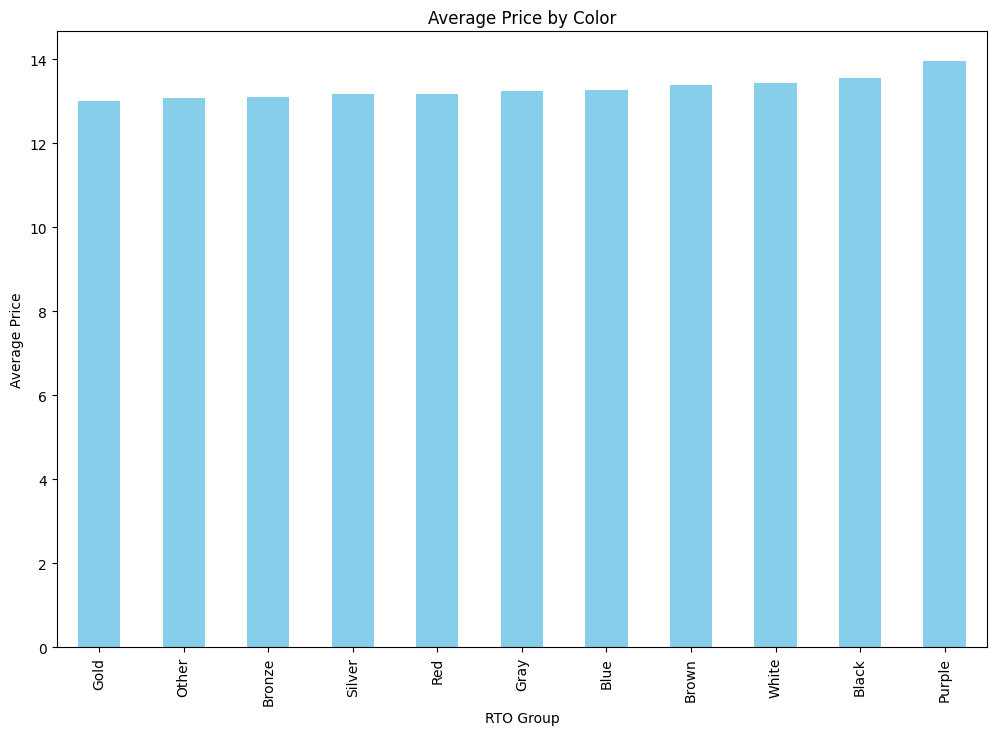

In [178]:
plt.figure(figsize=(12, 8))
average_prices = copy_cardekho.groupby('Color')['price'].mean().sort_values()
average_prices.plot(kind='bar', color='skyblue')
plt.xticks(rotation=90)
plt.title('Average Price by Color')
plt.xlabel('RTO Group')
plt.ylabel('Average Price')
plt.show()

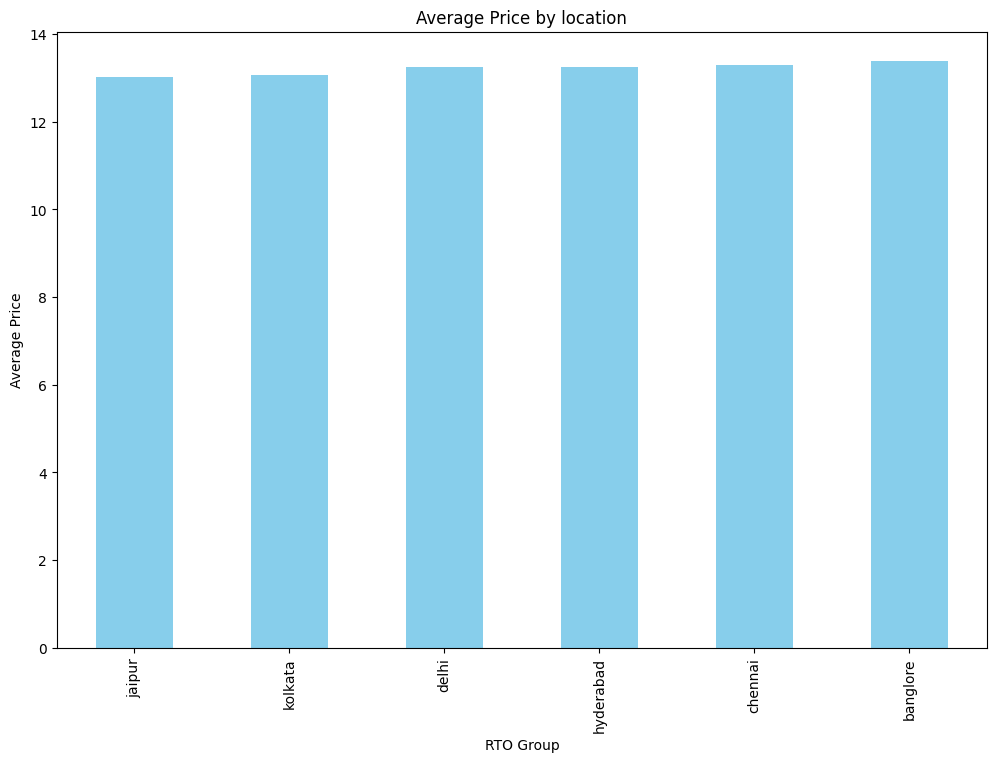

In [179]:
#location

plt.figure(figsize=(12, 8))
average_prices = copy_cardekho.groupby('location')['price'].mean().sort_values()
average_prices.plot(kind='bar', color='skyblue')
plt.xticks(rotation=90)
plt.title('Average Price by location')
plt.xlabel('RTO Group')
plt.ylabel('Average Price')
plt.show()

In [180]:
copy_cardekho.isna().sum()

ft                    0
km                    0
transmission          0
oem                   0
model                 0
modelYear             0
price                 0
Insurance Validity    0
RTO                   0
Torque                0
Color                 0
Displacement          0
Turbo Charger         0
Gear Box              0
location              0
Car_Age               0
dtype: int64

In [181]:
copy_cardekho.head(2)

,ft,km,transmission,oem,model,modelYear,price,Insurance Validity,RTO,Torque,Color,Displacement,Turbo Charger,Gear Box,location,Car_Age
0,Petrol,120000.0,Manual,Maruti,Maruti Celerio,2015,12.899222,Third Party,Karnataka,110.0,White,998.0,NO,5.0,banglore,9
1,Petrol,32706.0,Manual,Ford,Ford Ecosport,2018,13.606025,Comprehensive,Karnataka,150.0,White,1497.0,NO,5.0,banglore,6


In [186]:

copy_cardekho['Gear Box']=copy_cardekho['Gear Box'].astype(int)
copy_cardekho.dtypes

ft                     object
km                    float64
transmission           object
oem                    object
model                  object
modelYear               int64
price                 float64
Insurance Validity     object
RTO                    object
Torque                float64
Color                  object
Displacement          float64
Turbo Charger          object
Gear Box                int64
location               object
Car_Age                 int64
dtype: object

In [214]:
# Save the Encoded dataset for further analysing
copy_cardekho.to_csv(r'd:\0.Car Dekho Project 3\car Dekho pre_processed.csv',index=False)
print('the Encoded Data has been Saved')

the Encoded Data has been Saved


Encoding the Categorical features

In [187]:
#Import Lable Encoder 
from sklearn.preprocessing import LabelEncoder

In [215]:
copy_cardekho=pd.read_csv(r'd:\0.Car Dekho Project 3\car Dekho pre_processed.csv')

encoding_cardekho=copy_cardekho

In [216]:
# Separate the categorical columns (object type) from the original dataframe
categorical_features = encoding_cardekho.select_dtypes(include=['object'])
numerical_features=encoding_cardekho.select_dtypes(include=['number'])

# Initialize the LabelEncoder
label_encoder = LabelEncoder()


# Encode each categorical column using LabelEncoder
for col in categorical_features.columns:
    encoding_cardekho[col] = label_encoder.fit_transform(encoding_cardekho[col])

encoding_cardekho

,ft,km,transmission,oem,model,modelYear,price,Insurance Validity,RTO,Torque,Color,Displacement,Turbo Charger,Gear Box,location,Car_Age
0,2,120000.0,1,8,27,2015,12.899222,2,11,110.00,10,998.0,0,5,0,9
1,2,32706.0,1,1,1,2018,13.606025,0,11,150.00,10,1497.0,0,5,0,6
2,2,11949.0,1,12,44,2018,13.279369,0,11,114.00,8,1199.0,0,5,0,6
3,2,17794.0,1,3,16,2014,13.043322,0,11,113.75,6,1197.0,0,5,0,10
4,0,20000.0,1,4,19,2020,14.457365,2,11,350.00,6,1956.0,1,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5979,2,10000.0,1,8,27,2022,13.142168,2,20,110.00,6,998.0,0,5,5,2
5980,2,120000.0,1,8,24,2014,12.100718,2,20,110.00,6,796.0,0,5,5,10
5981,2,50000.0,0,9,37,2011,13.217675,2,23,285.00,6,1796.0,0,7,5,13
5982,2,40000.0,1,8,31,2012,11.849405,2,20,114.00,6,1197.0,0,5,5,12


Model Trainning

In [221]:
from sklearn.model_selection import train_test_split

# Split the Features and target
x=encoding_cardekho.drop(['price'],axis=1)
y=encoding_cardekho['price']

#Split the dataset for trainning and testing 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

print(f'trainning data shape: {x_train.shape}')
print(f'Tesing data shape: {x_test.shape}')



trainning data shape: (4787, 15)
Tesing data shape: (1197, 15)


In [219]:
encoding_cardekho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5984 entries, 0 to 5983
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ft                  5984 non-null   int64  
 1   km                  5984 non-null   float64
 2   transmission        5984 non-null   int64  
 3   oem                 5984 non-null   int64  
 4   model               5984 non-null   int64  
 5   modelYear           5984 non-null   int64  
 6   price               5984 non-null   float64
 7   Insurance Validity  5984 non-null   int64  
 8   RTO                 5984 non-null   int64  
 9   Torque              5984 non-null   float64
 10  Color               5984 non-null   int64  
 11  Displacement        5984 non-null   float64
 12  Turbo Charger       5984 non-null   int64  
 13  Gear Box            5984 non-null   int64  
 14  location            5984 non-null   int64  
 15  Car_Age             5984 non-null   int64  
dtypes: flo

Linear Regression Model

In [226]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor()
}

# Store the results
results = {}

# Evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(x_train, y_train)
    
    # Make predictions on training and test sets
    y_train_pred = model.predict(x_train)
    y_pred = model.predict(x_test)
    
    # Calculate training metrics using y_train_pred
    mse_train = mean_squared_error(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred) * 100
    
    # Calculate test metrics using y_pred
    mse_test = mean_squared_error(y_test, y_pred)
    mae_test = mean_absolute_error(y_test, y_pred)
    r2_test = r2_score(y_test, y_pred)
    mape_test = mean_absolute_percentage_error(y_test, y_pred) * 100
    
    # Store the results
    results[model_name] = {
        'MSE_train': mse_train,
        'MAE_train': mae_train,
        'R2_train': r2_train,
        'MAPE_train': mape_train,
        'MSE_test': mse_test,
        'MAE_test': mae_test,
        'R2_test': r2_test,
        'MAPE_test': mape_test
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T  # Transform DataFrame
print(results_df)


                   MSE_train  MAE_train  R2_train  MAPE_train  MSE_test  \
Linear Regression   0.054960   0.180780  0.858291    1.374951  0.055752   
Decision Tree       0.000141   0.000669  0.999638    0.005232  0.049198   
Random Forest       0.003911   0.042692  0.989916    0.327392  0.023993   
XGBoost             0.004549   0.049387  0.988271    0.376502  0.020802   

                   MAE_test   R2_test  MAPE_test  
Linear Regression  0.182071  0.868119   1.379652  
Decision Tree      0.154044  0.883622   1.176372  
Random Forest      0.109274  0.943246   0.833952  
XGBoost            0.100575  0.950793   0.768790  


Linear Regression underfits the data slightly, meaning it doesn't capture enough complexity.
Decision Tree overfits, performing perfectly on the training set but struggling to generalize.
Random Forest r2_score 0.94  and XGBoost r2_score 0.95 provide excellent generalization, with XGBoost slightly outperforming Random Forest in both accuracy and error metrics

Hyperparameter Tuning

In [227]:
# Optimize model parameters to improve performance.
from sklearn.model_selection import GridSearchCV

In [229]:
# Random Forest 

# Parameter grid for GridSearchCV
param = {
    'n_estimators': [100, 200, 300],  # Correct parameter name
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the base RandomForestRegressor model
random_forest = RandomForestRegressor(random_state=42)

# Implementing GridSearchCV to find the best hyperparameters
random_forest_GS = GridSearchCV(estimator=random_forest, param_grid=param, cv=5, 
                                 scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit the grid search model to the training data
random_forest_GS.fit(x_train, y_train)


# Output the best parameters and best score
best_params = random_forest_GS.best_params_
best_score = random_forest_GS.best_score_
print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Score (neg MSE): {best_score}')  # Note: This is negative MSE

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Cross-Validation Score (neg MSE): -0.029604547516852365


In [232]:
# XGBoost

# Define the grid of hyperparameters to search
best_parameters = { 
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [2, 3, 5],
    'subsample': [0.3, 0.5, 0.8],
    'colsample_bytree': [0.3, 0.5, 0.8]
}

# Create the XGBoost regressor model
xgb_model = XGBRegressor()

# Set up GridSearchCV with 5-fold cross-validation
xgb_gridsearch = GridSearchCV(xgb_model, param_grid=best_parameters, cv=5, 
                              scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Train the model using GridSearchCV
xgb_gridsearch.fit(x_train, y_train)

# Output the best parameters and best score from GridSearchCV
best_params = xgb_gridsearch.best_params_
best_score = xgb_gridsearch.best_score_

print('Best Parameters:', best_params)
print('Best Score (from GridSearchCV):', best_score)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
Best Score (from GridSearchCV): -0.02224689006428844


Re-Evaluate with best parameter

In [235]:
# Revaluate with the best parameters 
# Best Random Forest Parameters: 
#Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}



# Initialize and train the Random Forest model with best parameters
random_forest_ht = RandomForestRegressor(n_estimators=300, 
                                 max_depth=20, 
                                 min_samples_split=2, 
                                 min_samples_leaf=1,
                                 random_state=42)

random_forest_ht.fit(x_train, y_train)

# Make predictions
y_train_pred_rf = random_forest_ht.predict(x_train)

# Calculate metrics for the training set
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)
mape_train_rf = mean_absolute_percentage_error(y_train, y_train_pred_rf) * 100

# Print metrics for the training set
print(f"Random Forest Train MSE: {mse_train_rf}")
print(f"Random Forest Train R^2: {r2_train_rf}")
print(f"Random Forest Train MAPE: {mape_train_rf}%")

# Make predictions on the test set
y_test_pred_rf = random_forest_ht.predict(x_test)

# Calculate metrics for the test set
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)
mape_test_rf = mean_absolute_percentage_error(y_test, y_test_pred_rf) * 100

# Print metrics for the test set
print(f"Random Forest Test MSE: {mse_test_rf}")
print(f"Random Forest Test R^2: {r2_test_rf}")
print(f"Random Forest Test MAPE: {mape_test_rf}%")

Random Forest Train MSE: 0.0038268955039040737
Random Forest Train R^2: 0.9901326551868923
Random Forest Train MAPE: 0.3275427176190417%
Random Forest Test MSE: 0.023874759753937193
Random Forest Test R^2: 0.94352431476442
Random Forest Test MAPE: 0.8342528555263878%


In [236]:
#Best XGBoost Parameters: 
#Best Parameters: {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}


# Initialize and train the XGBoost model with best parameters
xgb_model = XGBRegressor( 
                         colsample_bytree=0.3, 
                         learning_rate=0.1, 
                         max_depth=5, 
                         n_estimators=300, 
                         subsample=0.8, 
                         random_state=42)

xgb_model.fit(x_train, y_train)


# Make predictions
y_train_pred_xgb = xgb_model.predict(x_train)

# Calculate metrics
mse_train_xgb = mean_squared_error(y_train, y_train_pred_xgb)
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)
mape_train_xgb = mean_absolute_percentage_error(y_train, y_train_pred_xgb) * 100

print(f"XGBoost Train MSE: {mse_train_xgb}")
print(f"XGBoost Train R^2: {r2_train_xgb}")
print(f"XGBoost Train MAPE: {mape_train_xgb}%")

# Make predictions
y_test_pred_xgb = xgb_model.predict(x_test)

# Calculate metrics
mse_test_xgb = mean_squared_error(y_test, y_test_pred_xgb)
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)
mape_test_xgb = mean_absolute_percentage_error(y_test, y_test_pred_xgb) * 100

print(f"XGBoost Test MSE: {mse_test_xgb}")
print(f"XGBoost Test R^2: {r2_test_xgb}")
print(f"XGBoost Test MAPE: {mape_test_xgb}%")

XGBoost Train MSE: 0.00986901145451029
XGBoost Train R^2: 0.9745535411440377
XGBoost Train MAPE: 0.5615103861459347%
XGBoost Test MSE: 0.01818385584140658
XGBoost Test R^2: 0.9569861339149565
XGBoost Test MAPE: 0.7379709498916008%


XGBoost provides slightly better test performance (lower test MSE, higher R², and lower MAPE), indicating it may generalize better to unseen data.

In [237]:
copy_cardekho.head(2)

,ft,km,transmission,oem,model,modelYear,price,Insurance Validity,RTO,Torque,Color,Displacement,Turbo Charger,Gear Box,location,Car_Age
0,2,120000.0,1,8,27,2015,12.899222,2,11,110.0,10,998.0,0,5,0,9
1,2,32706.0,1,1,1,2018,13.606025,0,11,150.0,10,1497.0,0,5,0,6


In [240]:
# Predicting with the trained XGBoost model
prediction = xgb_model.predict([[2, 120000.0, 1, 8, 27, 2015, 2, 11, 110.0, 10, 998.0, 0, 5, 0, 9]])
print(prediction)


[12.831775]
